In this notebook, I explored the pseudotime analysis for the brain lineage. I tried using different subsets of celltypes for this. But it was not possible to get biologically meaningful results unfortunately. 

In [2]:
import scanpy as sc
import pandas as pd
import unitvelo as utv
import leidenalg
import scvelo as scv
scv.settings.verbosity = 0
import tensorflow as tf
print ("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import cellrank as cr


(Running UniTVelo 0.1.6)
2022-05-30 14:42:25


2022-05-30 16:42:31.112277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


Num GPUs Available:  0


2022-05-30 16:43:43.287676: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-30 16:43:43.287740: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
plot_dir = "/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data_new/Kathi/plots/"

# scVI embedding

This was run on the cluster using the old datset with only three timepoints.

In [172]:
rna = sc.read_h5ad("/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data/jupyter_notebooks/scvi_10_dim_old_data/anndata_object")

In [173]:
#sc.tl.pca(rna)
#sc.pp.neighbors(rna, n_pcs=30, n_neighbors=20)
sc.pp.neighbors(rna, use_rep="X_scVI")

sc.tl.umap(rna, min_dist=0.1)

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


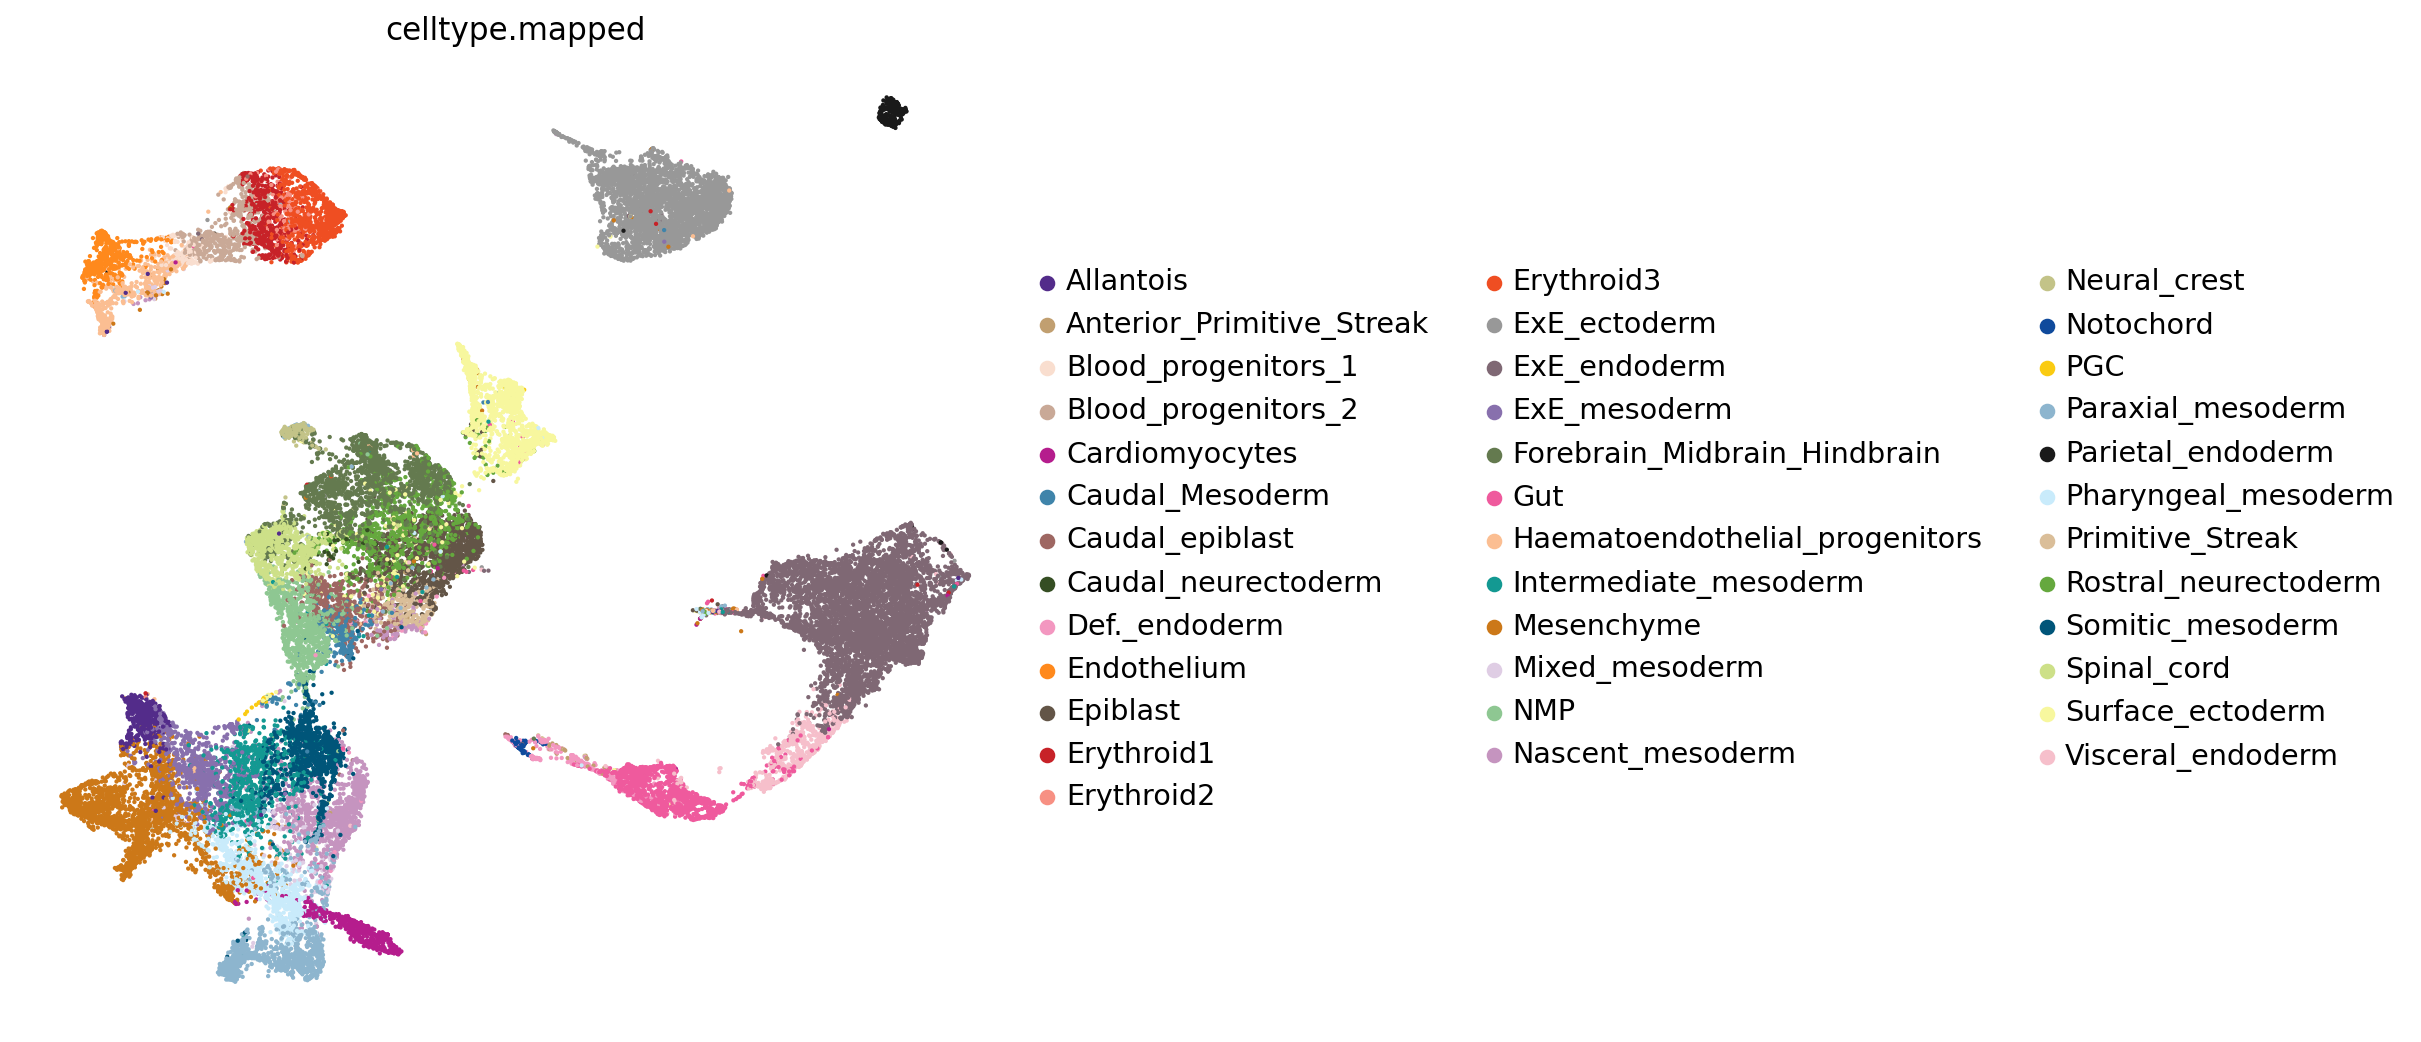

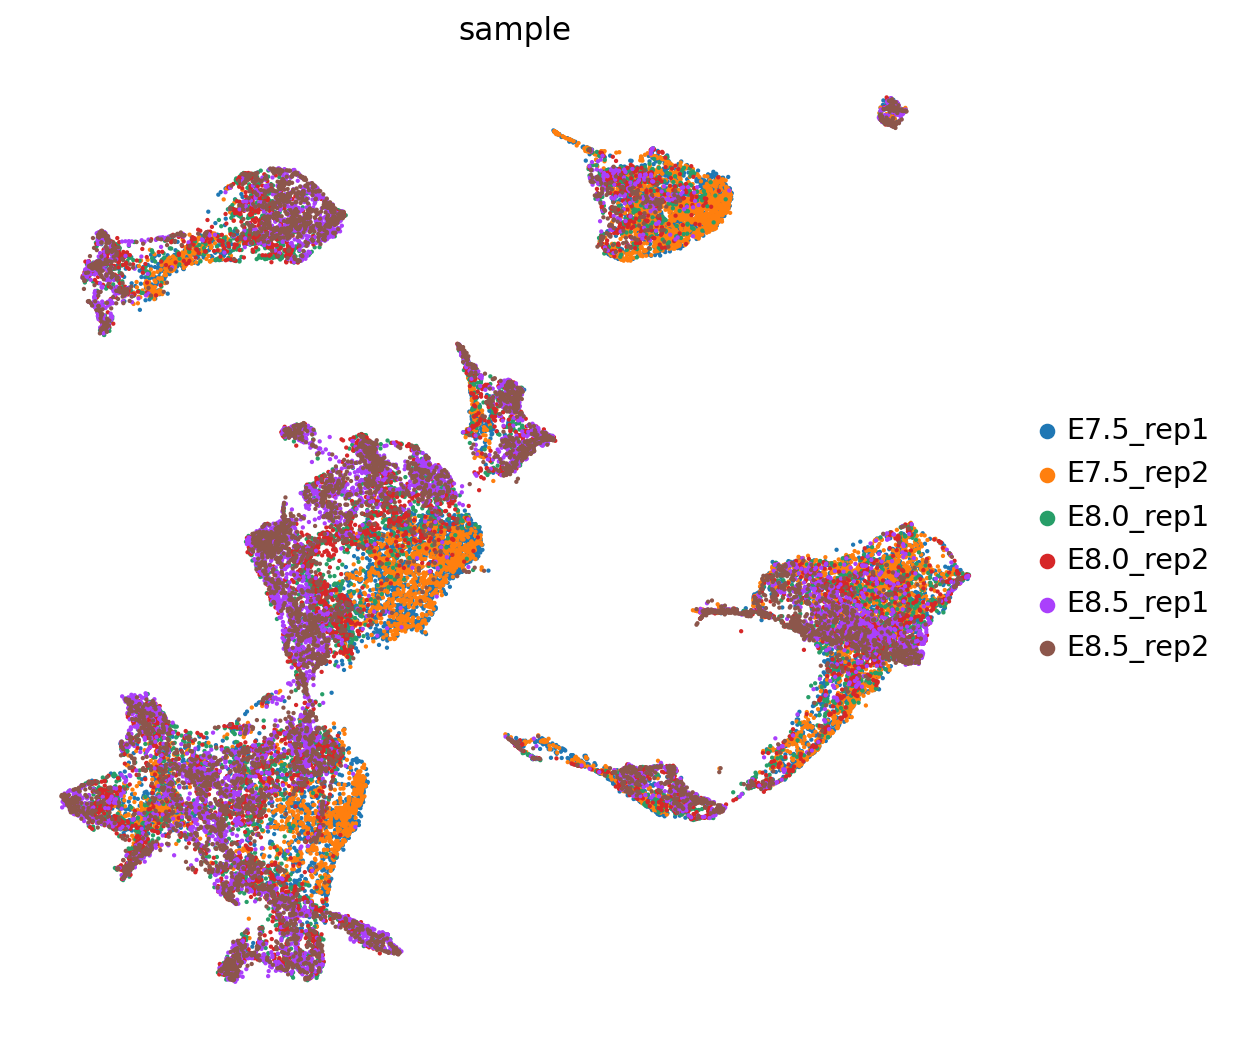

In [174]:
sc.set_figure_params(figsize=(8,8))
sc.pl.umap(
    rna,
    color=["celltype.mapped"],
    frameon=False,
    size=15
)
sc.pl.umap(
    rna,
    color=["sample"],
    ncols=2,
    frameon=False,
    size=15
)

### scVI embedding brain

In [166]:
brain_scvi = sc.read_h5ad("/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data/jupyter_notebooks/scvi_10_dim_brain/anndata_object")

In [178]:
sc.pp.regress_out(brain_scvi, ['nCount_RNA', 'mitochondrial_percent_RNA'])


sc.pp.scale(brain_scvi, max_value=10)


In [175]:
sc.tl.pca(brain_scvi, svd_solver='arpack')

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


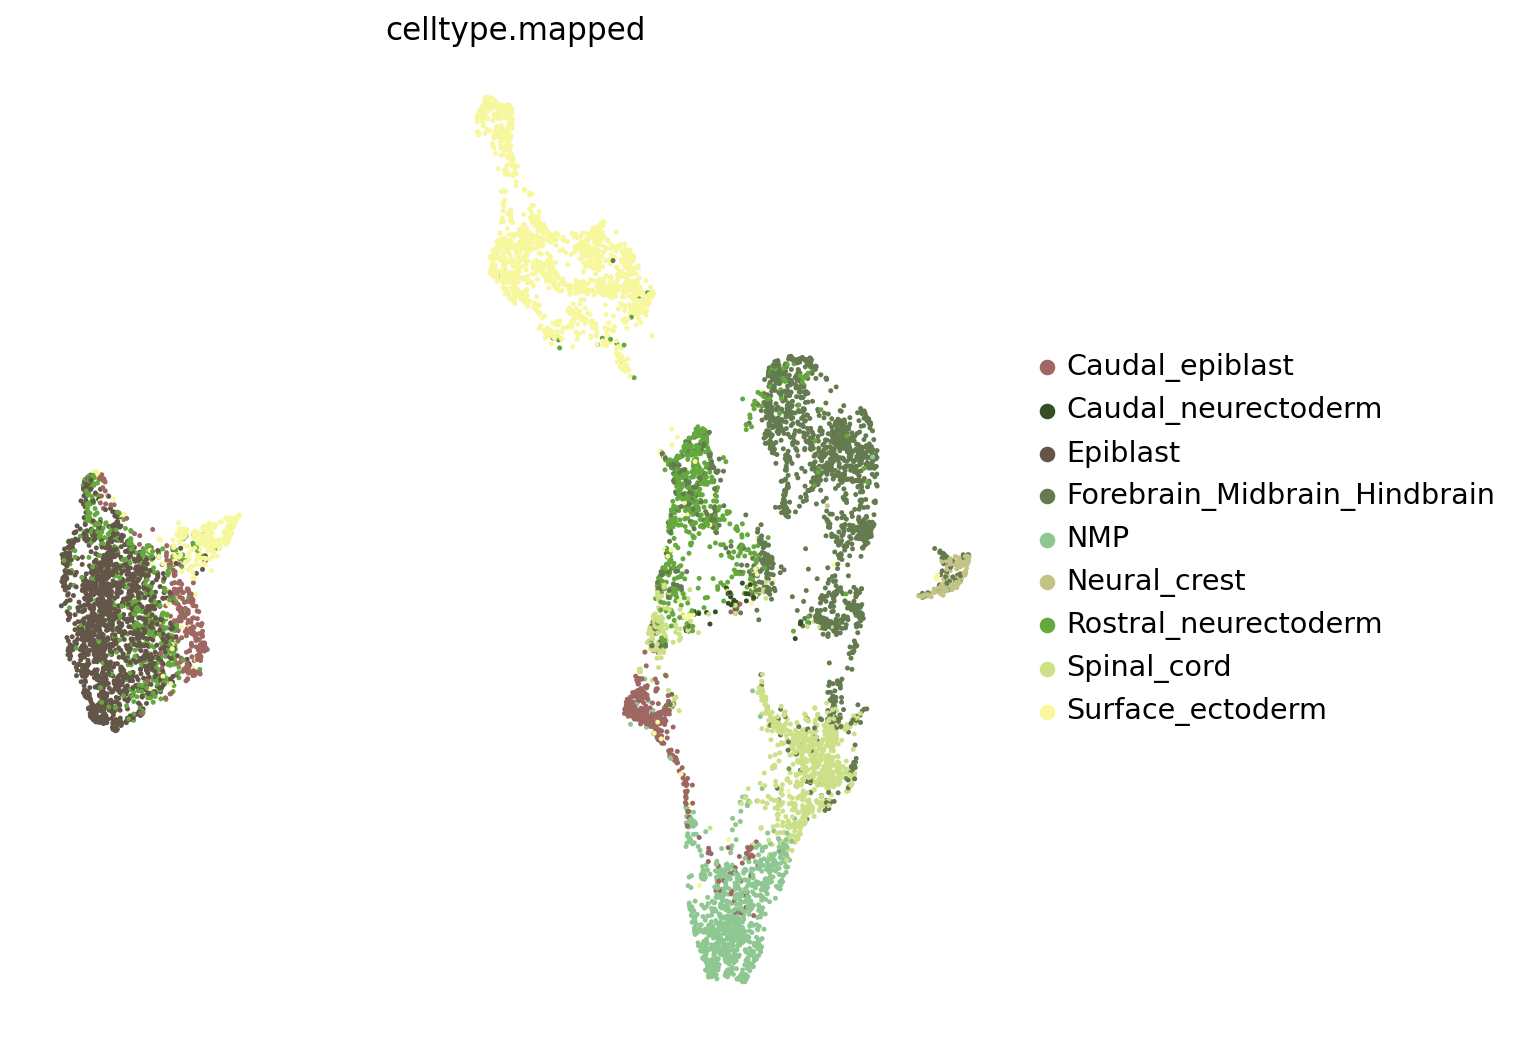

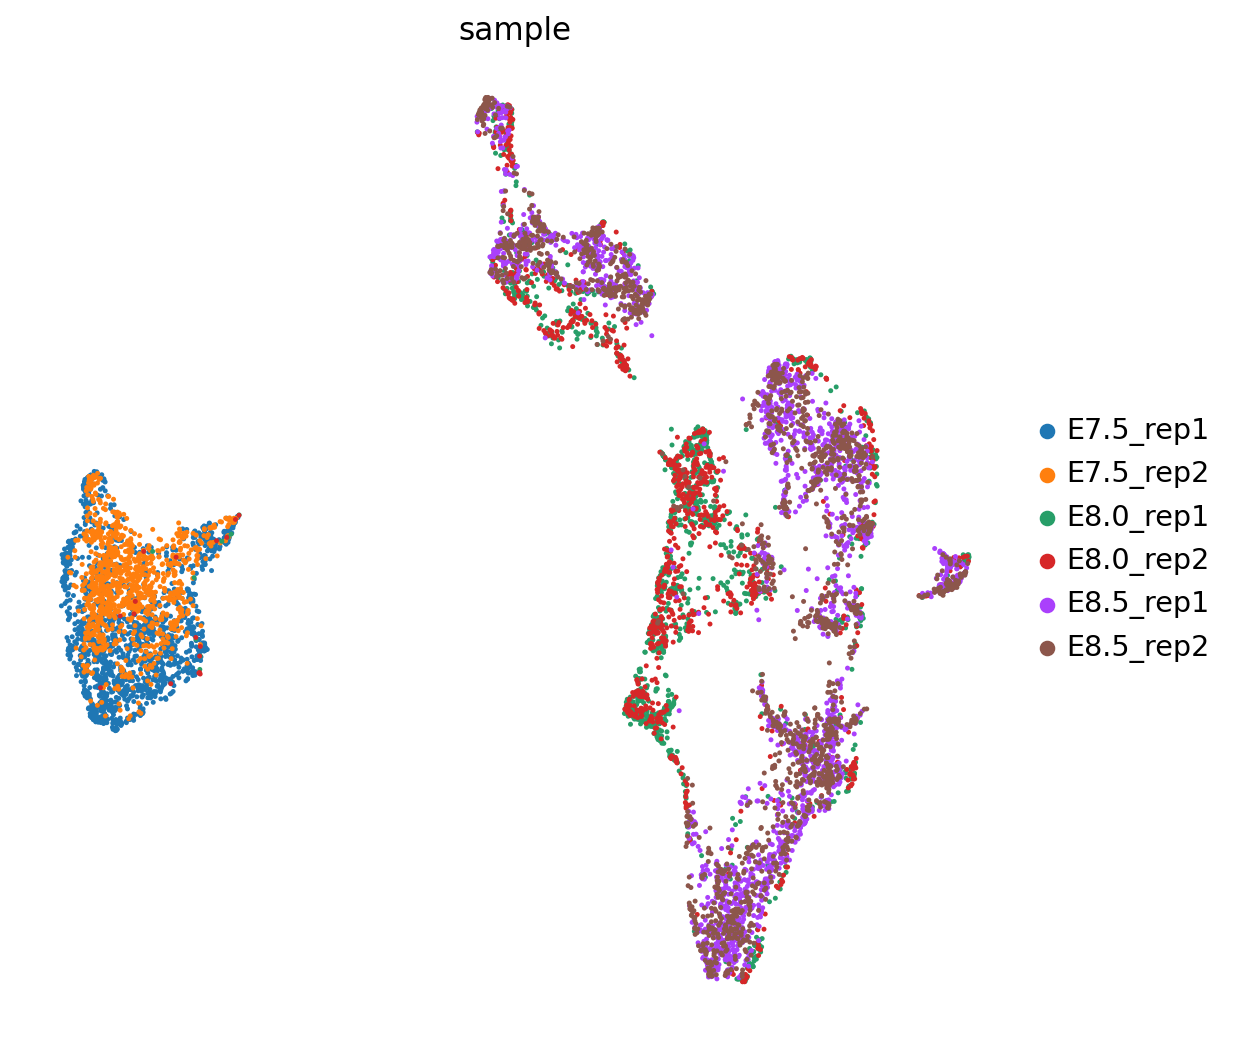

In [177]:
sc.pp.neighbors(brain_scvi, use_rep="X_pca")
sc.tl.umap(brain_scvi, min_dist=0.1)

sc.set_figure_params(figsize=(8,8))
sc.pl.umap(
    brain_scvi,
    color=["celltype.mapped"],
    frameon=False,
    size=20
)
sc.pl.umap(
    brain_scvi,
    color=["sample"],
    ncols=2,
    frameon=False,
    size=20
)

In [167]:
#sc.tl.pca(rna)
#sc.pp.neighbors(rna, n_pcs=30, n_neighbors=20)
sc.pp.neighbors(brain_scvi, use_rep="X_scVI")

sc.tl.umap(brain_scvi, min_dist=0.1)

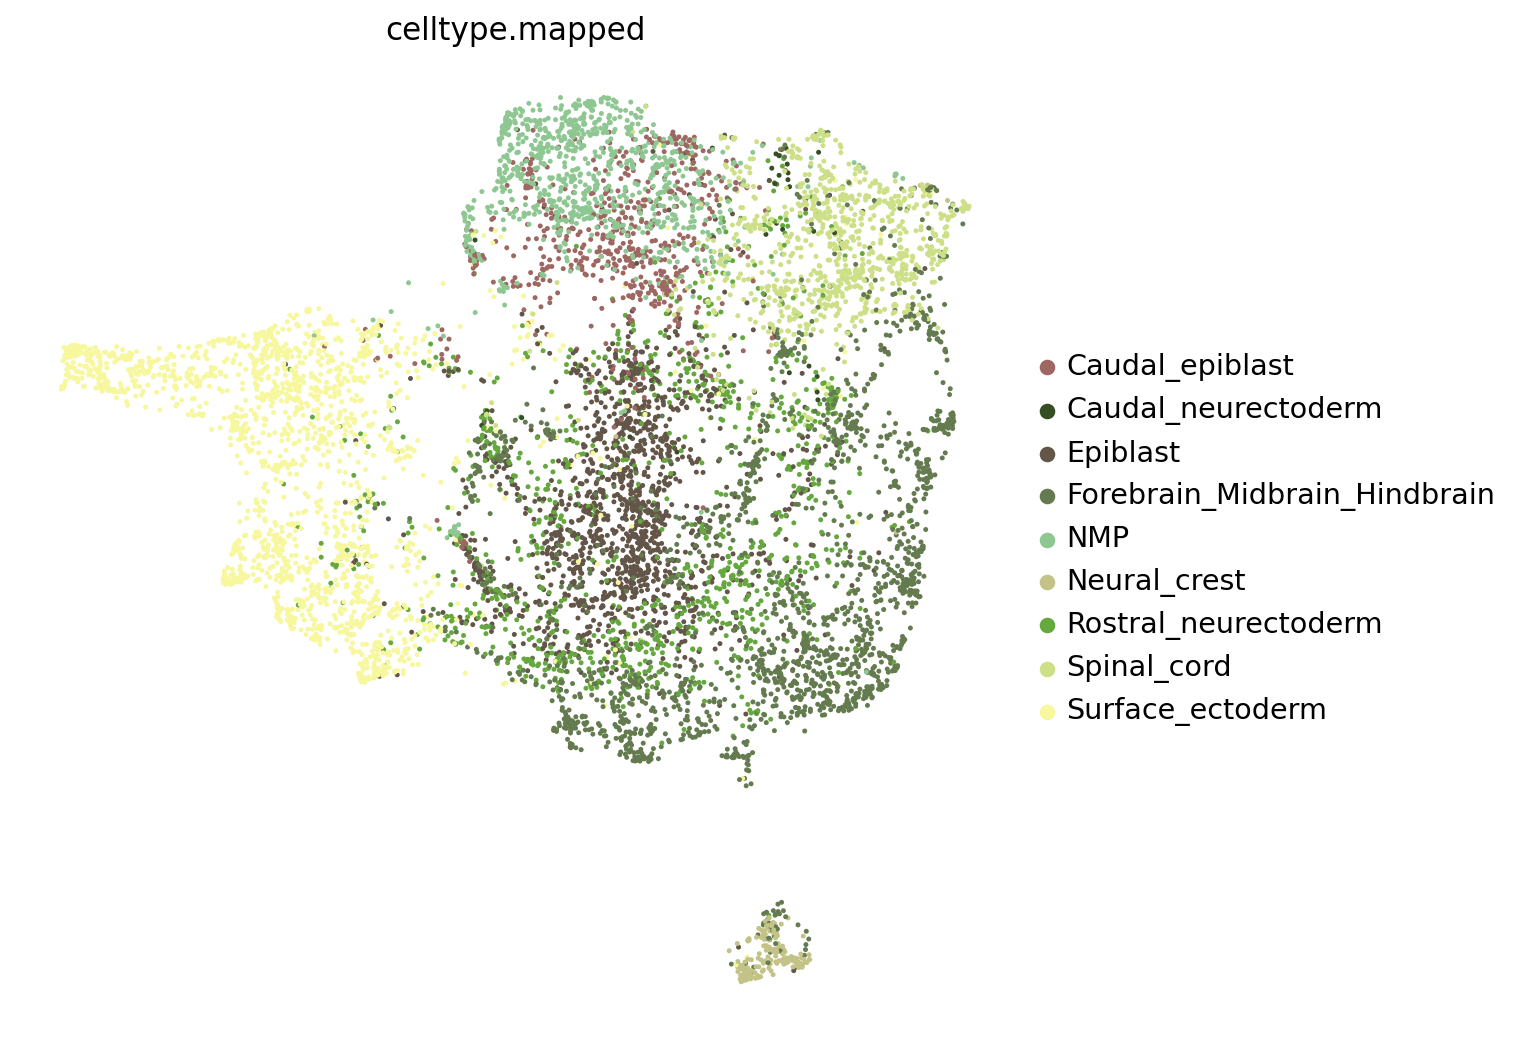

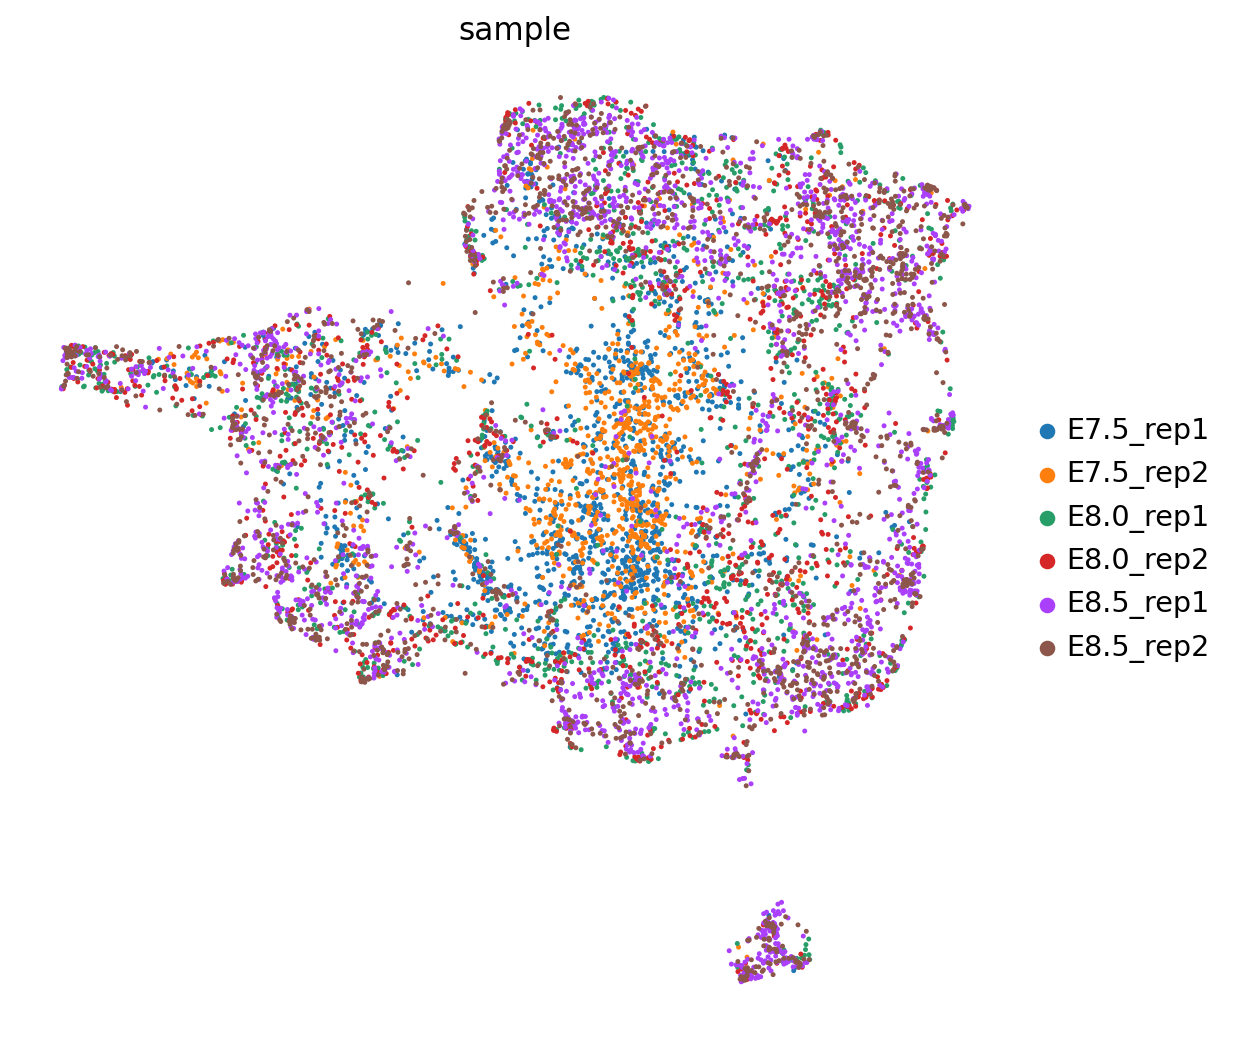

In [169]:
sc.set_figure_params(figsize=(8,8))
sc.pl.umap(
    brain_scvi,
    color=["celltype.mapped"],
    frameon=False,
    size=20
)
sc.pl.umap(
    brain_scvi,
    color=["sample"],
    ncols=2,
    frameon=False,
    size=20
)

# UniTVelo
this was run on the cluster

## Brain

In [3]:
brain = rna[rna.obs["celltype.mapped"].isin(["Forebrain_Midbrain_Hindbrain", "Neural_crest", "Rostral_neurectoderm", "Spinal_cord", "Caudal_neurectoderm", "Surface_ectoderm", "NMP", "Epiblast", "Caudal_epiblast"])] 

NameError: name 'rna' is not defined

In [ ]:
brain.X = brain.layers["counts"].todense()

In [ ]:
sc.pl.umap(brain, color = "celltype.mapped", save = "brain_umap.pdf")

In [31]:
#sc.write("/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data/UniTVelo/adata_brain_scvi.h5ad", brain)

In [54]:
label = "celltype.mapped"

In [29]:
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = True
velo_config.IROOT = None
velo_config.FIT_OPTION = '1'
velo_config.GPU = -1

### Use bifurcating trajectory

In [4]:
adata = sc.read_h5ad("/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data/UniTVelo/unitvelo_adata_brain_scvi.h5ad")

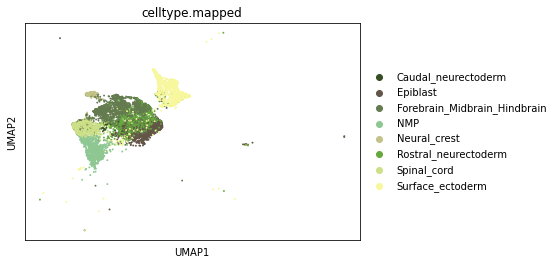

In [6]:
sc.pl.umap(adata, color = "celltype.mapped", save = "brain_umap.pdf")

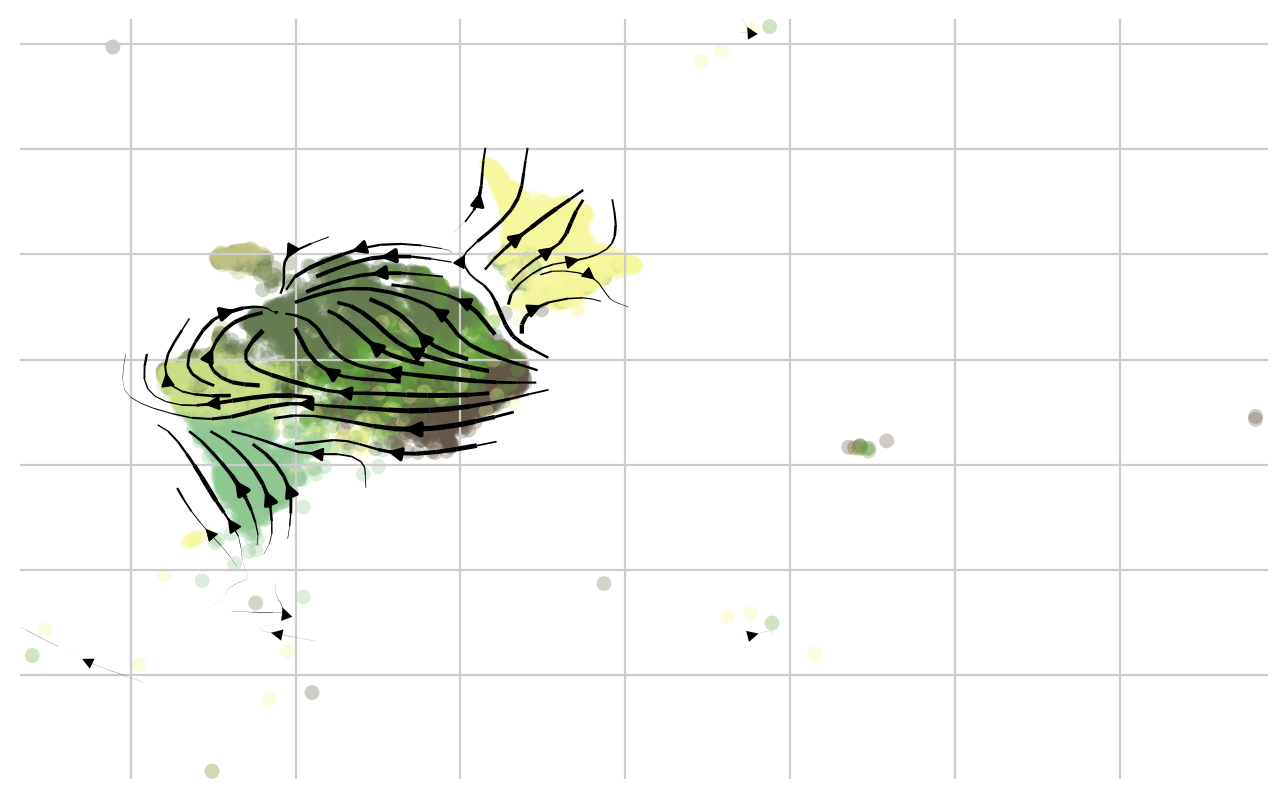

In [23]:
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'],
                                 dpi=100, title='', legend_fontsize = 10,
                                 legend_loc='none',
                                save=plot_dir + "brain_rna_velocity.png")

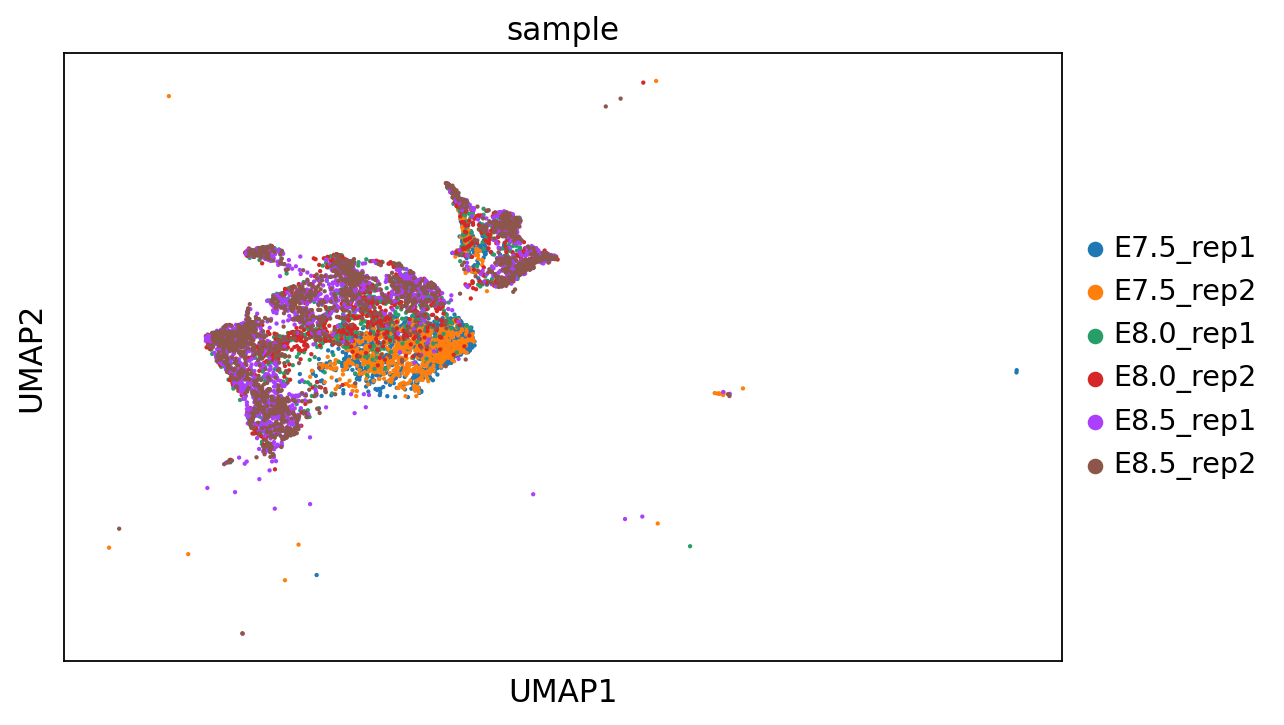

In [8]:
sc.set_figure_params(figsize=(8,5))
sc.pl.umap(adata, color = "sample", size = 15, save = "brain_samples.pdf")

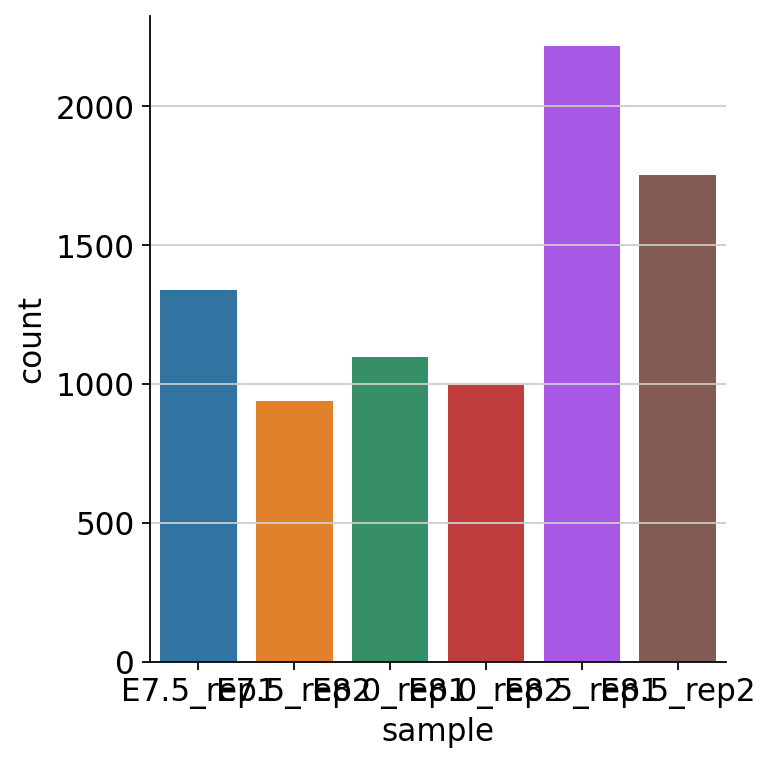

In [124]:
import seaborn as sns
sc.set_figure_params(figsize=(8,15))
sns.catplot(x="sample",  kind="count", data=adata.obs)

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)
/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


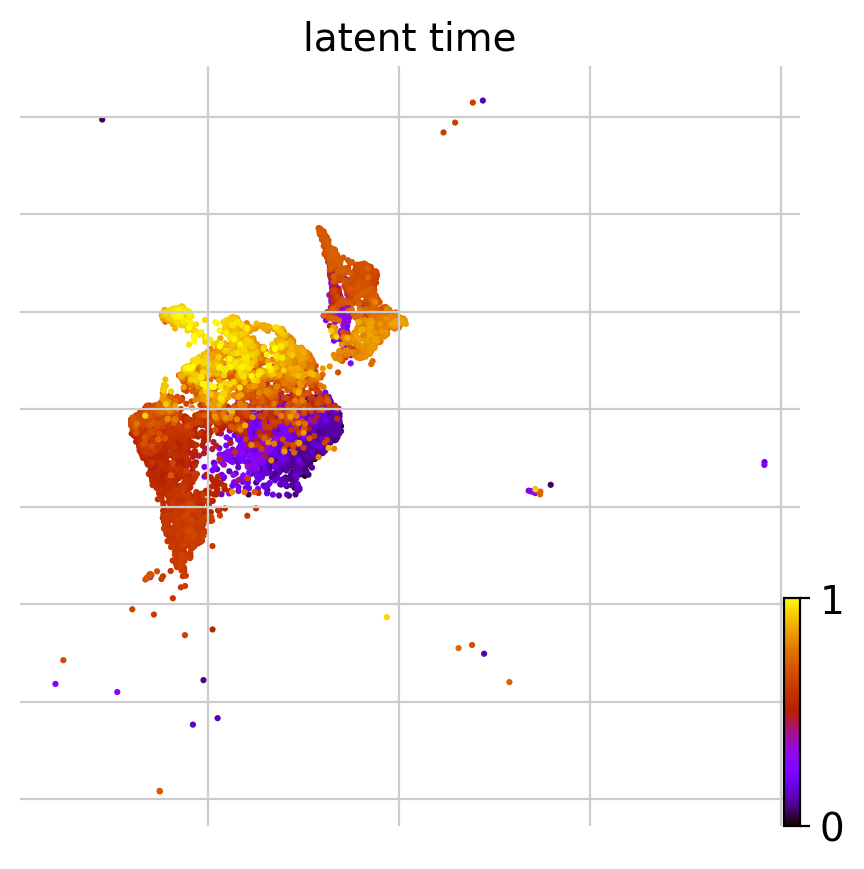

In [125]:
sc.set_figure_params(figsize=(5,5))

scv.tl.latent_time(adata, min_likelihood=None)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=20, dpi=100)

In [126]:
subvar = adata.var.loc[adata.var['velocity_genes'] == True]
sub = adata[:, subvar.index]

Text(0.5, 1.0, 'Peak Time')

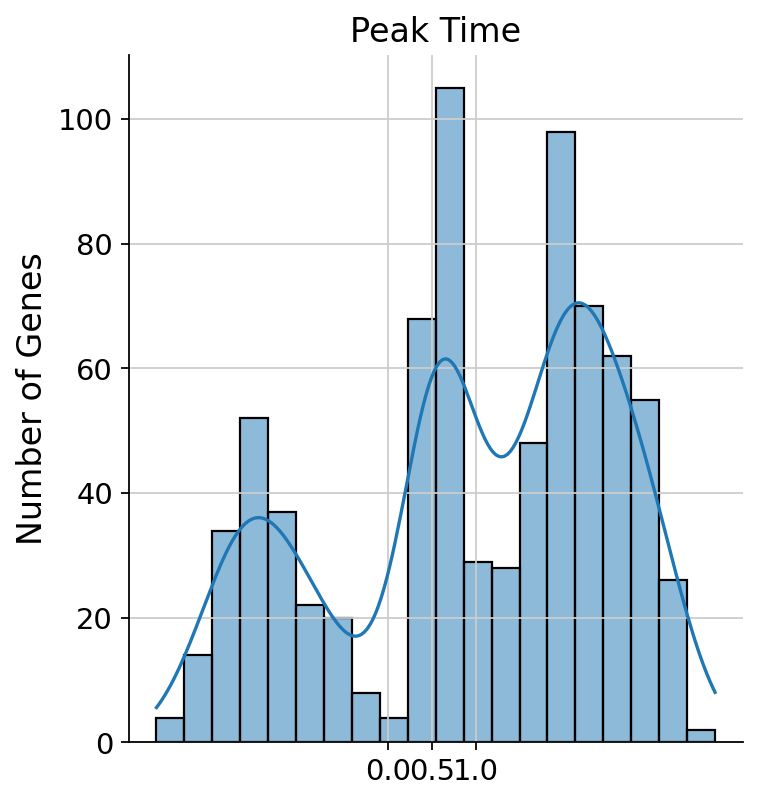

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(sub.var['fit_t0'].values, kde=True, bins=20)
plt.xticks([0, 0.5, 1], fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Number of Genes', fontsize=15)
plt.title('Peak Time', fontsize=15)

In [13]:
label = "celltype.mapped"

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.
/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/cellrank/tl/_init_term_states.py:161: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  **kwargs,


  0%|          | 0/8340 [00:00<?, ?cell/s]

  0%|          | 0/8340 [00:00<?, ?cell/s]

Mat Object: 1 MPI processes
  type: seqdense
9.9999999999999989e-01 2.0467167242090790e-04 
0.0000000000000000e+00 9.9987137032077988e-01 


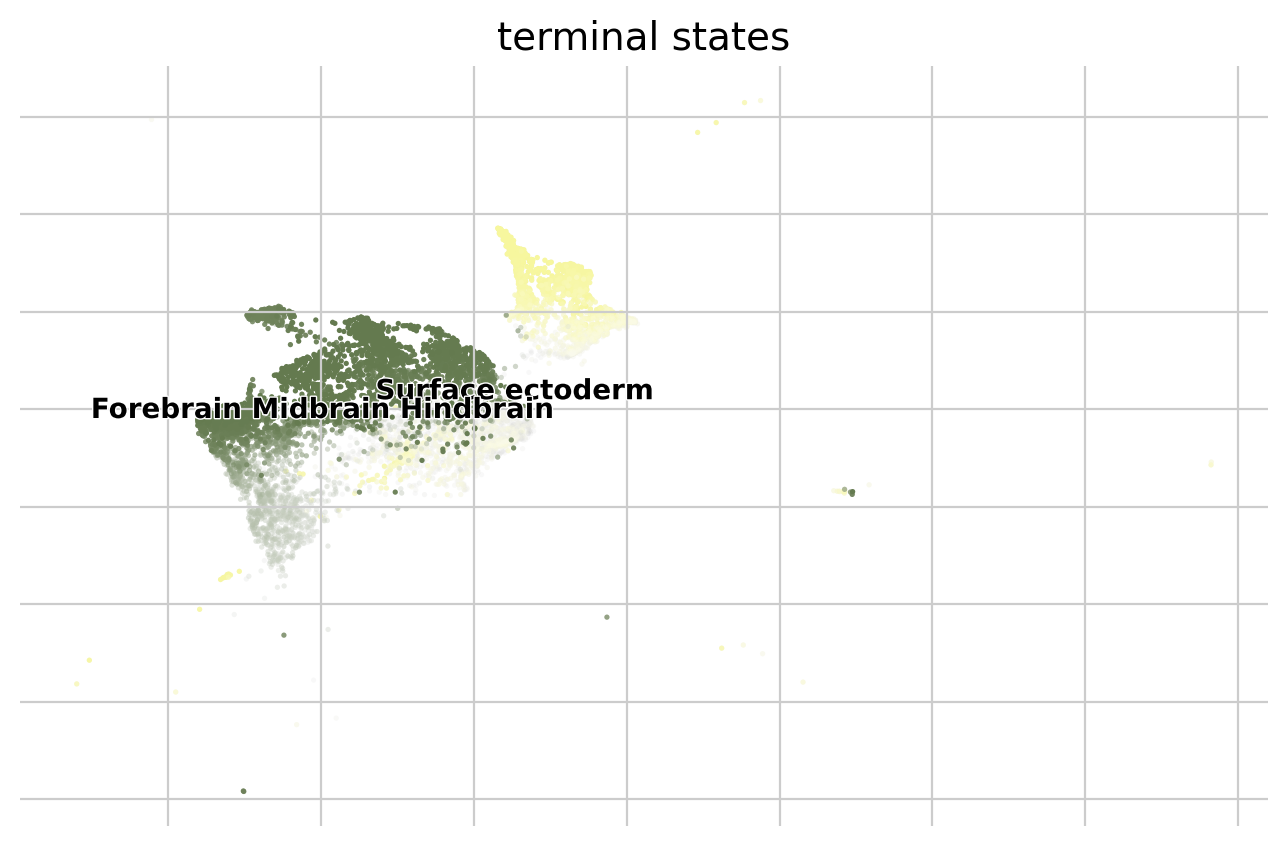

In [14]:
cr.tl.terminal_states(adata, cluster_key=label, weight_connectivities=0.2)#, n_states=4)
cr.pl.terminal_states(adata, dpi = 100, legend_fontsize=10, save = plot_dir + "terminal_brain.pdf")

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.
/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/cellrank/tl/_init_term_states.py:161: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  **kwargs,


  0%|          | 0/8340 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: 

  0%|          | 0/8340 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0
[unset]: write_line error; fd=-1 buf=:cmd=abort exitcode=59
:
system msg for write_line failure : Bad file descriptor


Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000044e+00 3.5552221233896574e-04 
0.0000000000000000e+00 9.9918060574255874e-01 


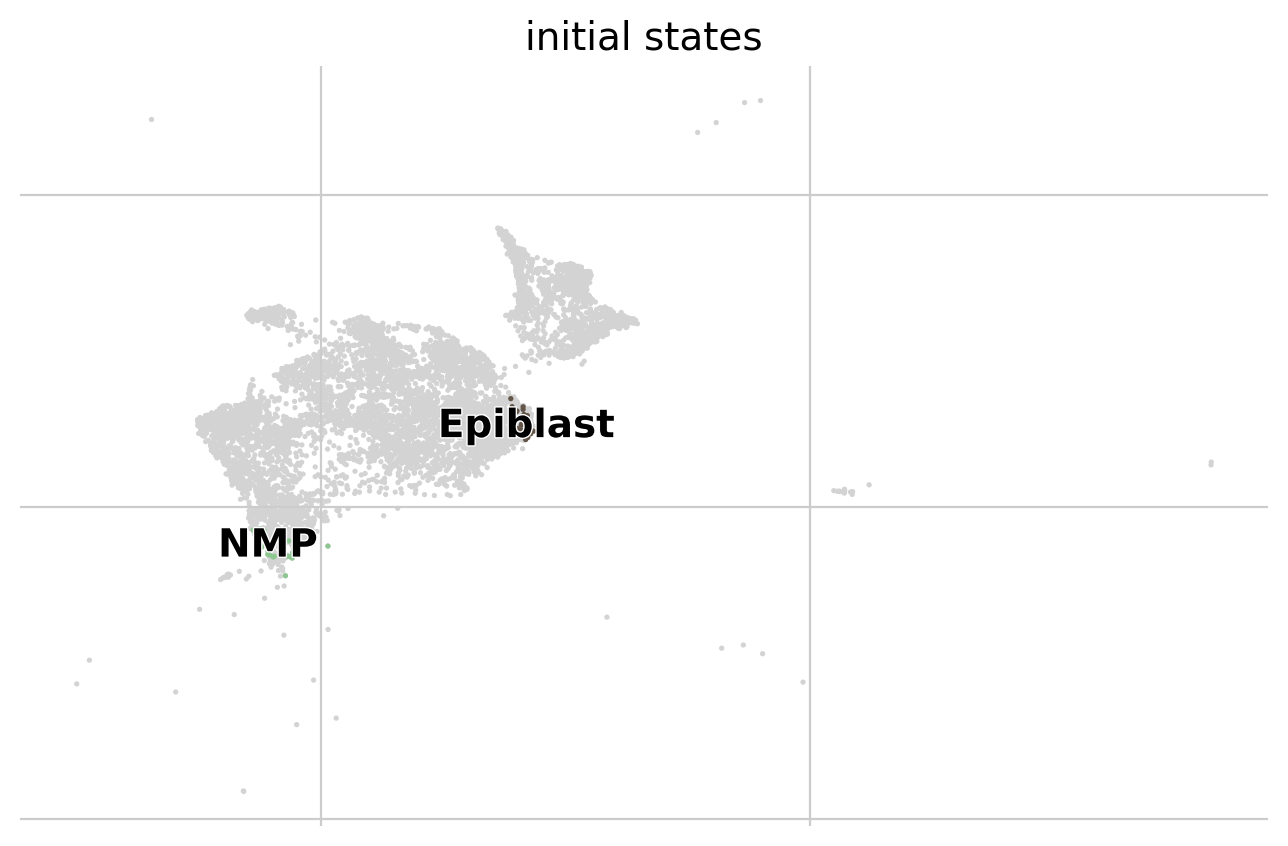

In [16]:
cr.tl.initial_states(adata, cluster_key=label)
cr.pl.initial_states(adata, discrete=True, dpi = 100, save=plot_dir+"initial_brain.pdf")

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


  0%|          | 0/2 [00:00<?, ?/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: [0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: /omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


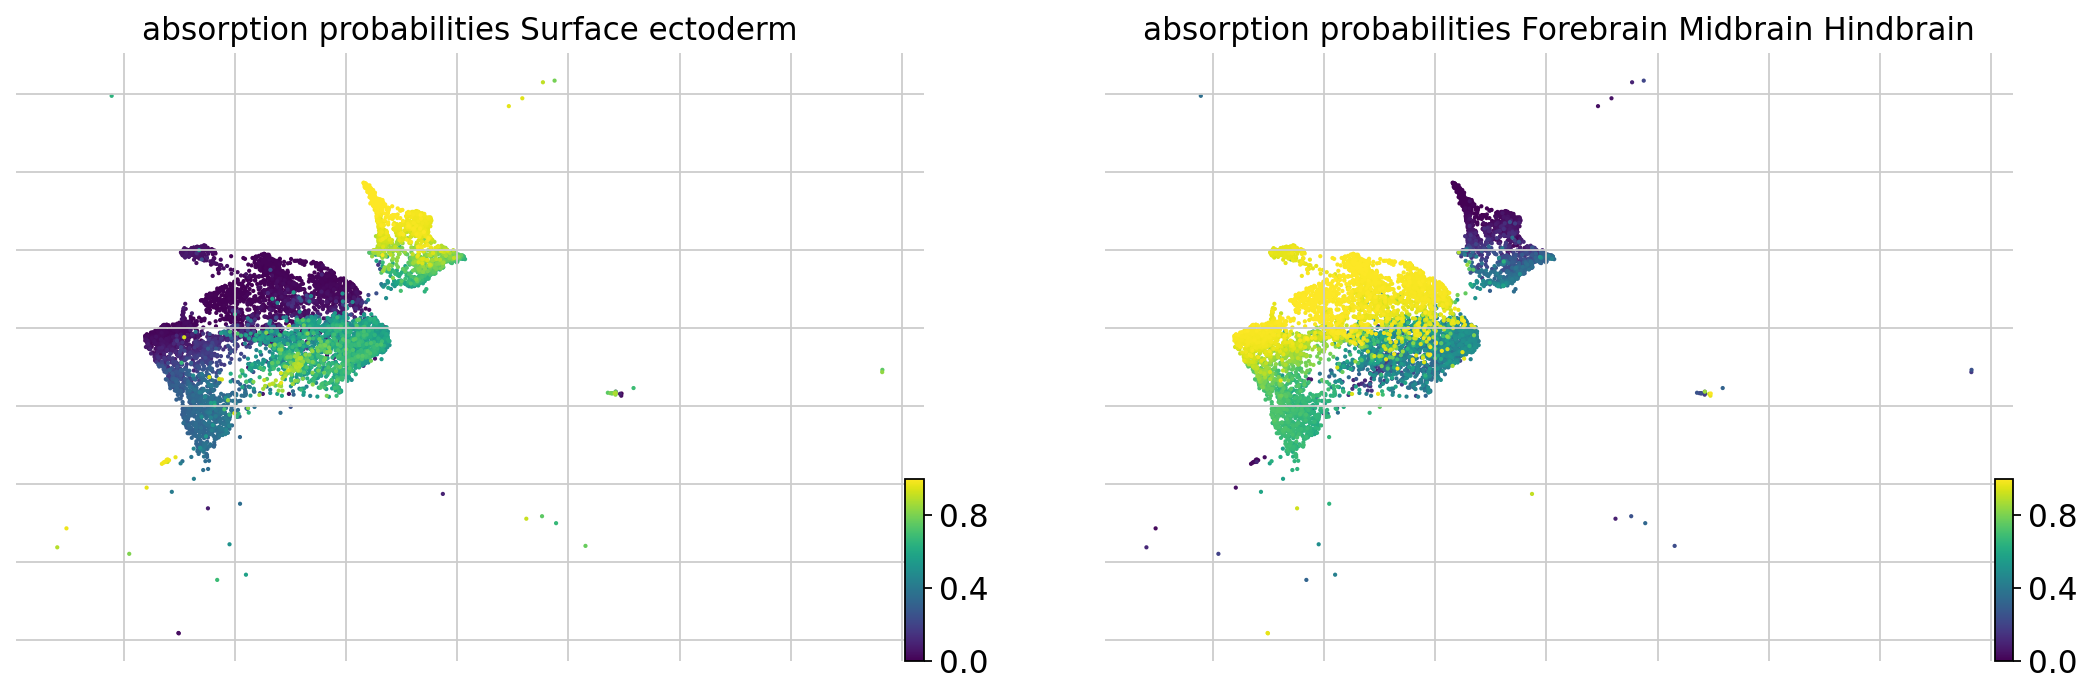

In [17]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False, save=plot_dir + "absoprtion_prob_brain.pdf")

### Use single trajectory - forebrain/midbrain/hindbrain


In [92]:
rostral = rna[rna.obs["celltype.mapped"].isin(["Forebrain_Midbrain_Hindbrain", "Neural_crest", "Rostral_neurectoderm", "Epiblast"]),] 

In [93]:
rostral.X = rostral.layers["counts"].todense()

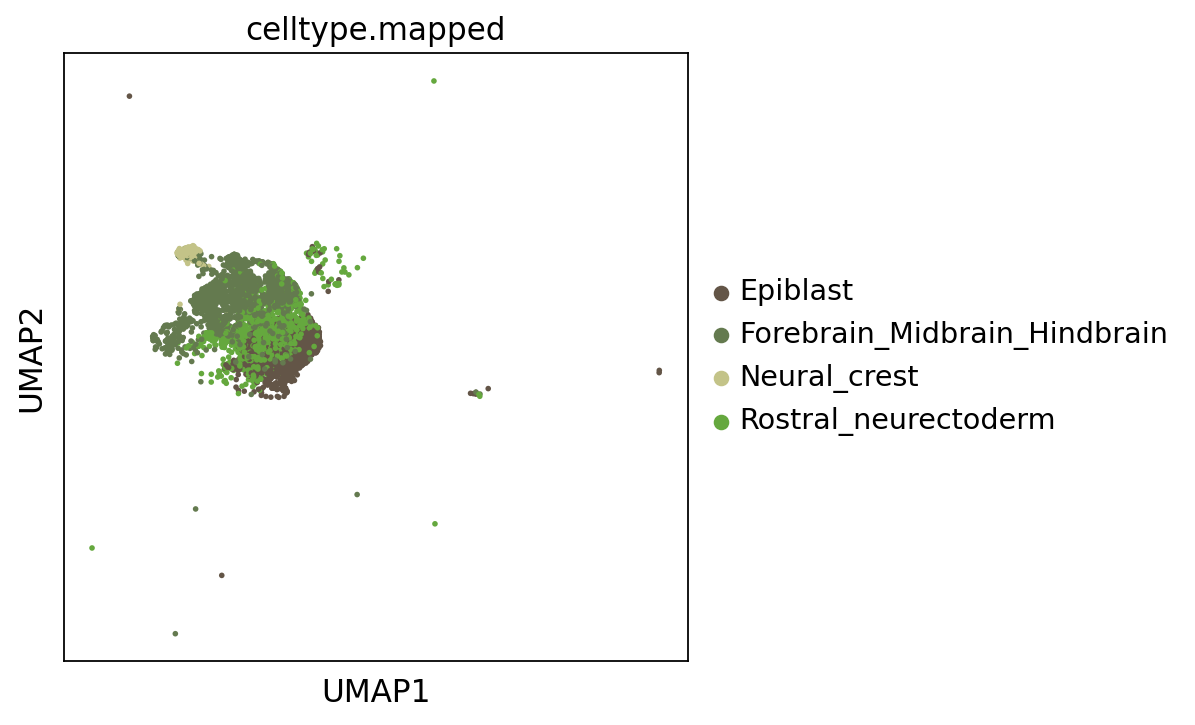

In [94]:
sc.pl.umap(rostral, color = "celltype.mapped")

In [96]:
#sc.write("/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data/UniTVelo/adata_brain_rostral_scvi.h5ad", rostral)

In [97]:
adata = sc.read_h5ad("/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data/UniTVelo/unitvelo_adata_brain_rostral_scvi.h5ad")

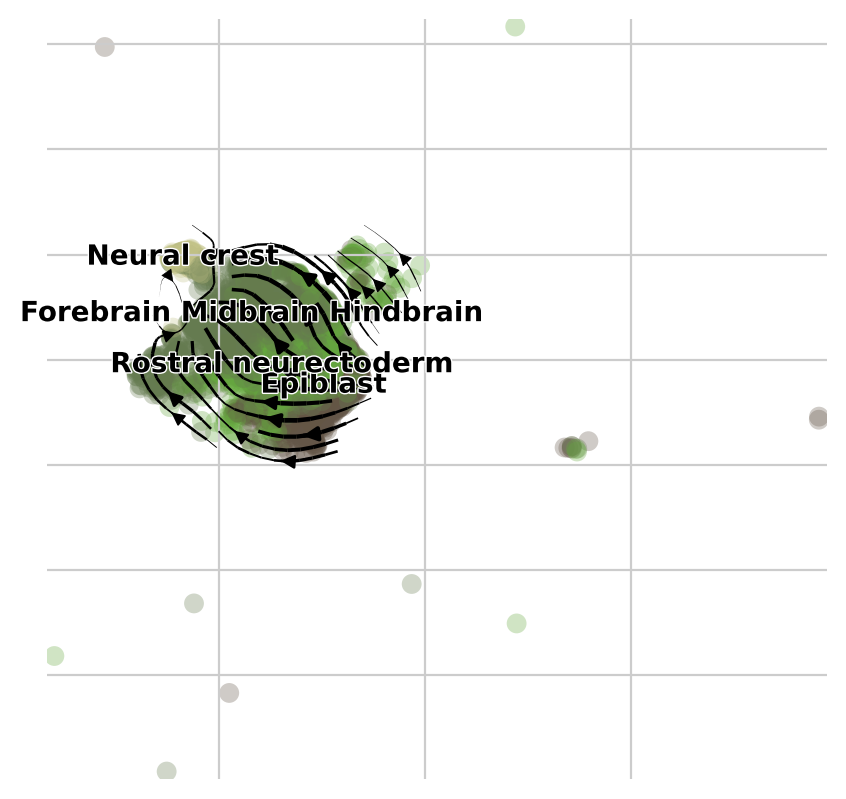

In [103]:
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='', legend_fontsize = 10)

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.
/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/cellrank/tl/_init_term_states.py:161: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  **kwargs,


  0%|          | 0/4710 [00:00<?, ?cell/s]

[0]PETSC ERROR: 

  0%|          | 0/4710 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: [0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


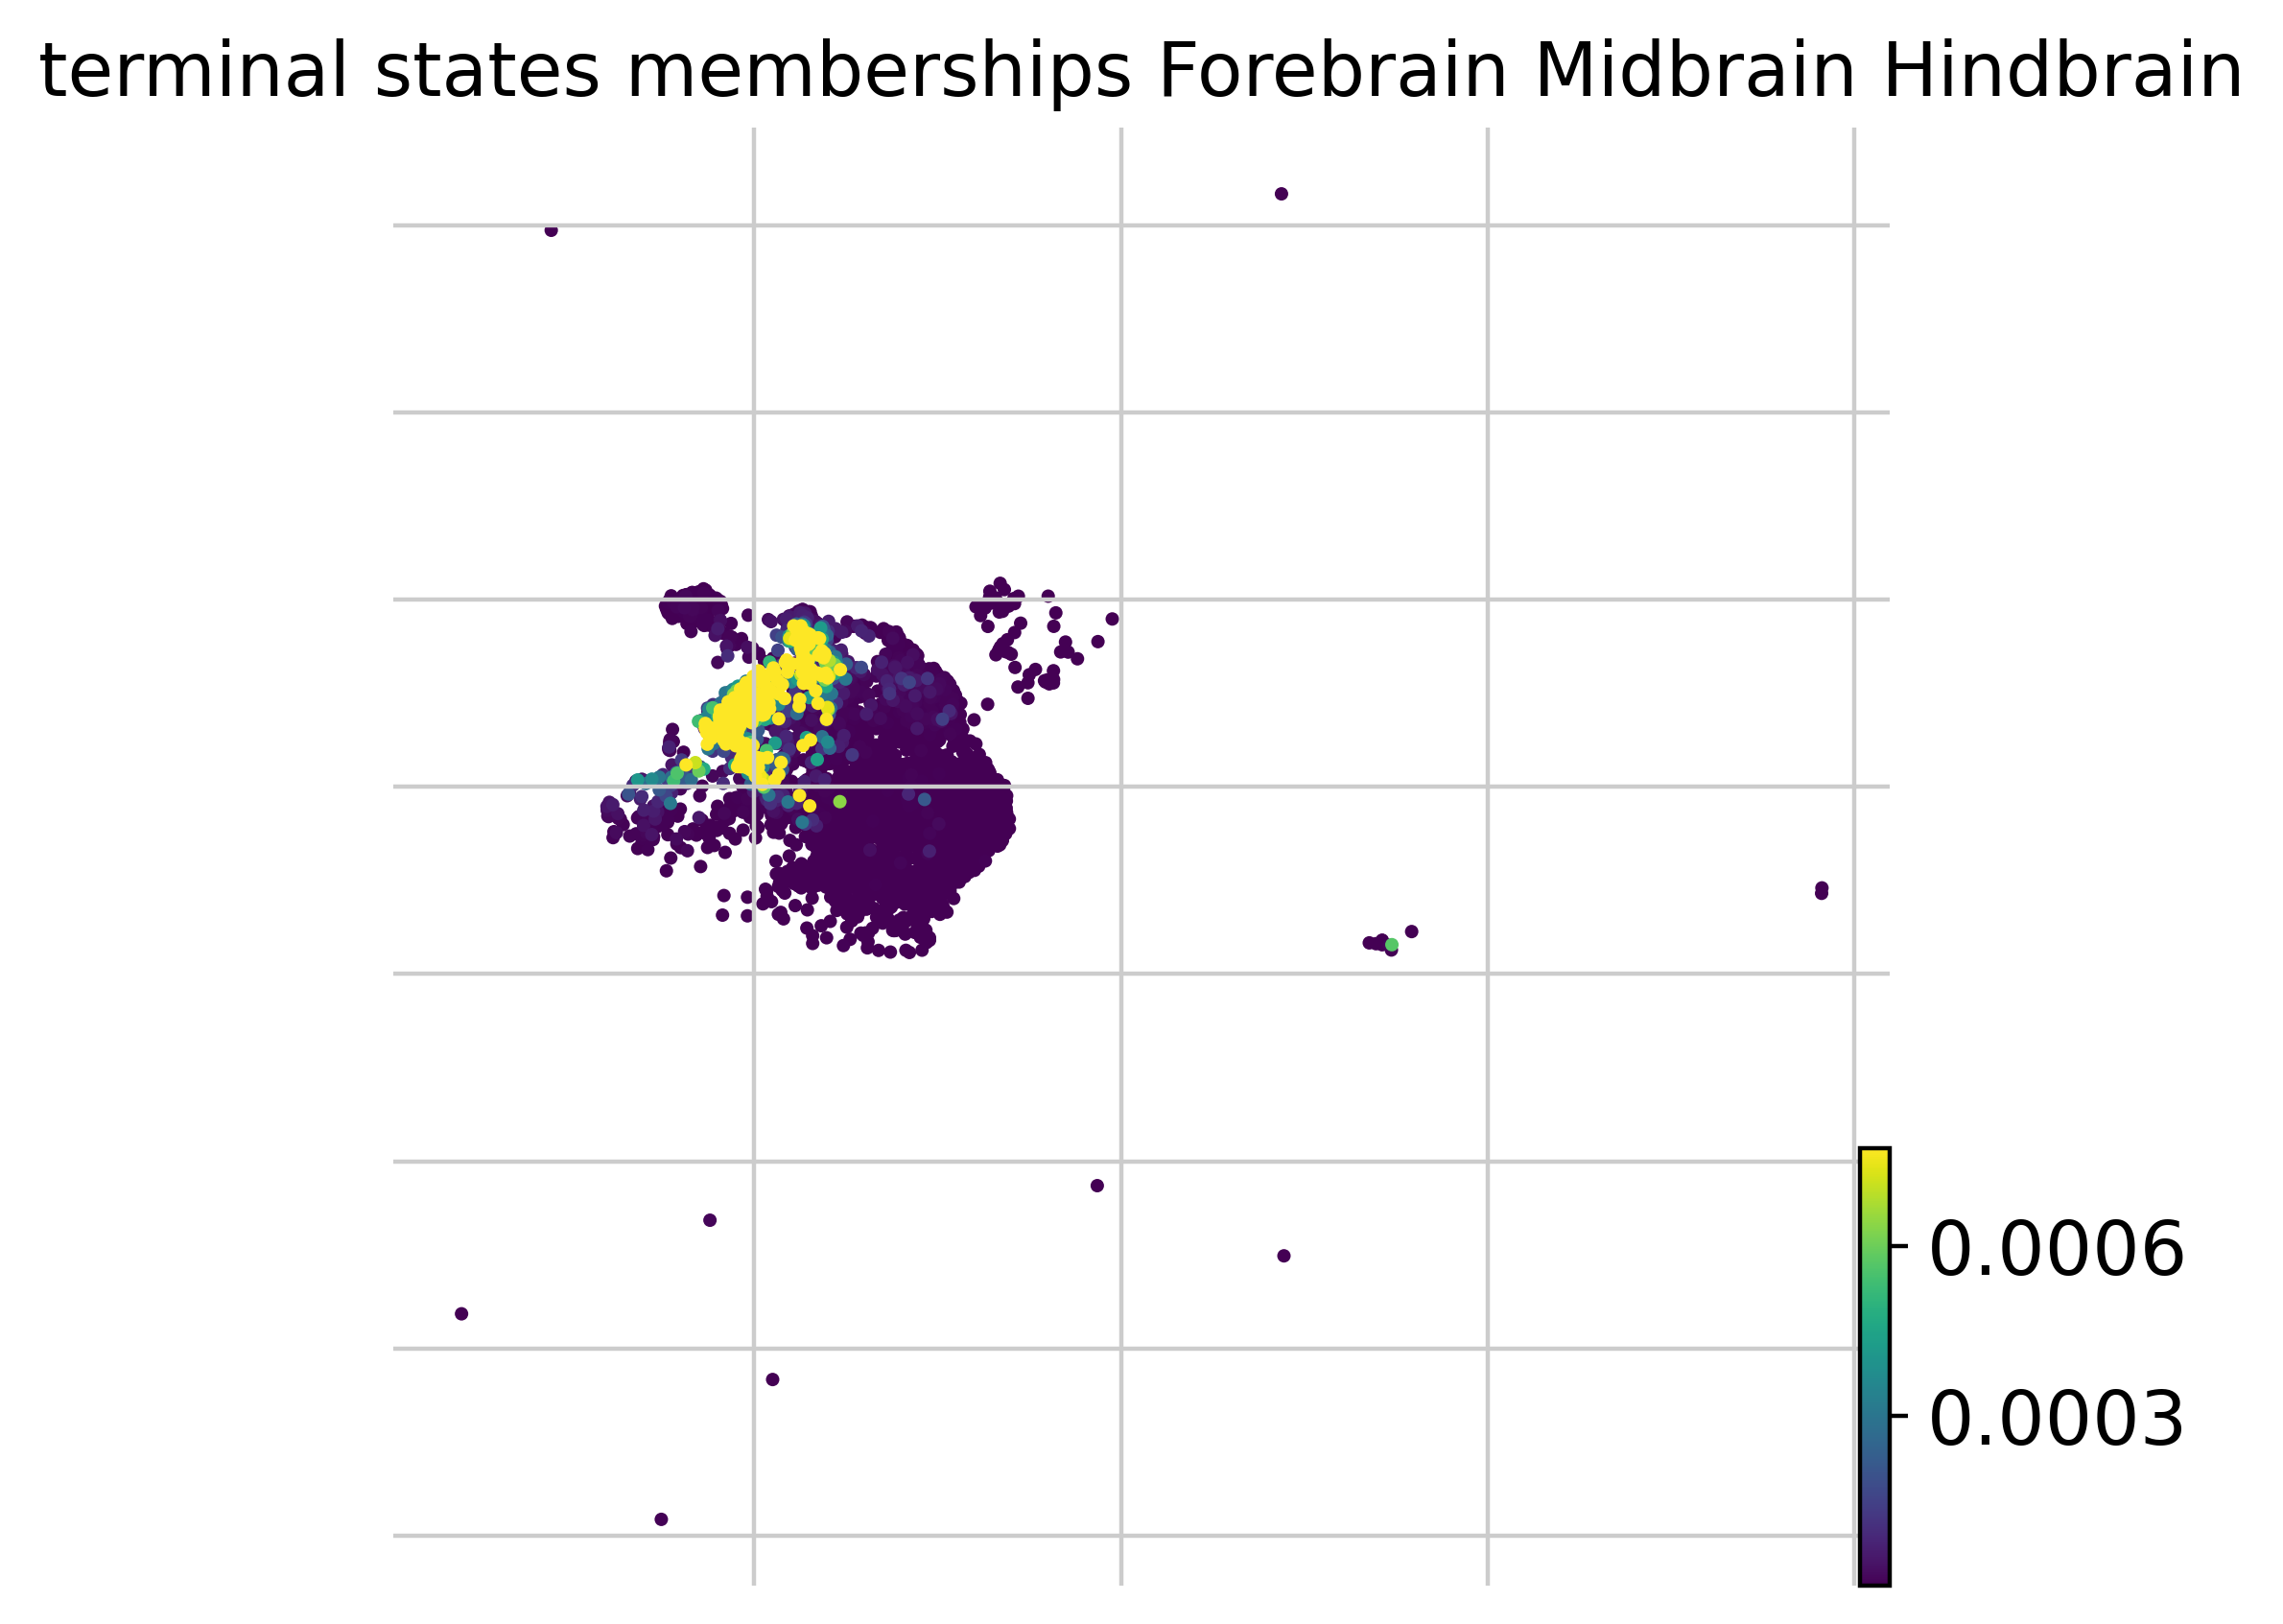

In [104]:
cr.tl.terminal_states(adata, cluster_key=label, weight_connectivities=0.2)#, n_states=4)
cr.pl.terminal_states(adata, dpi = 200)

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


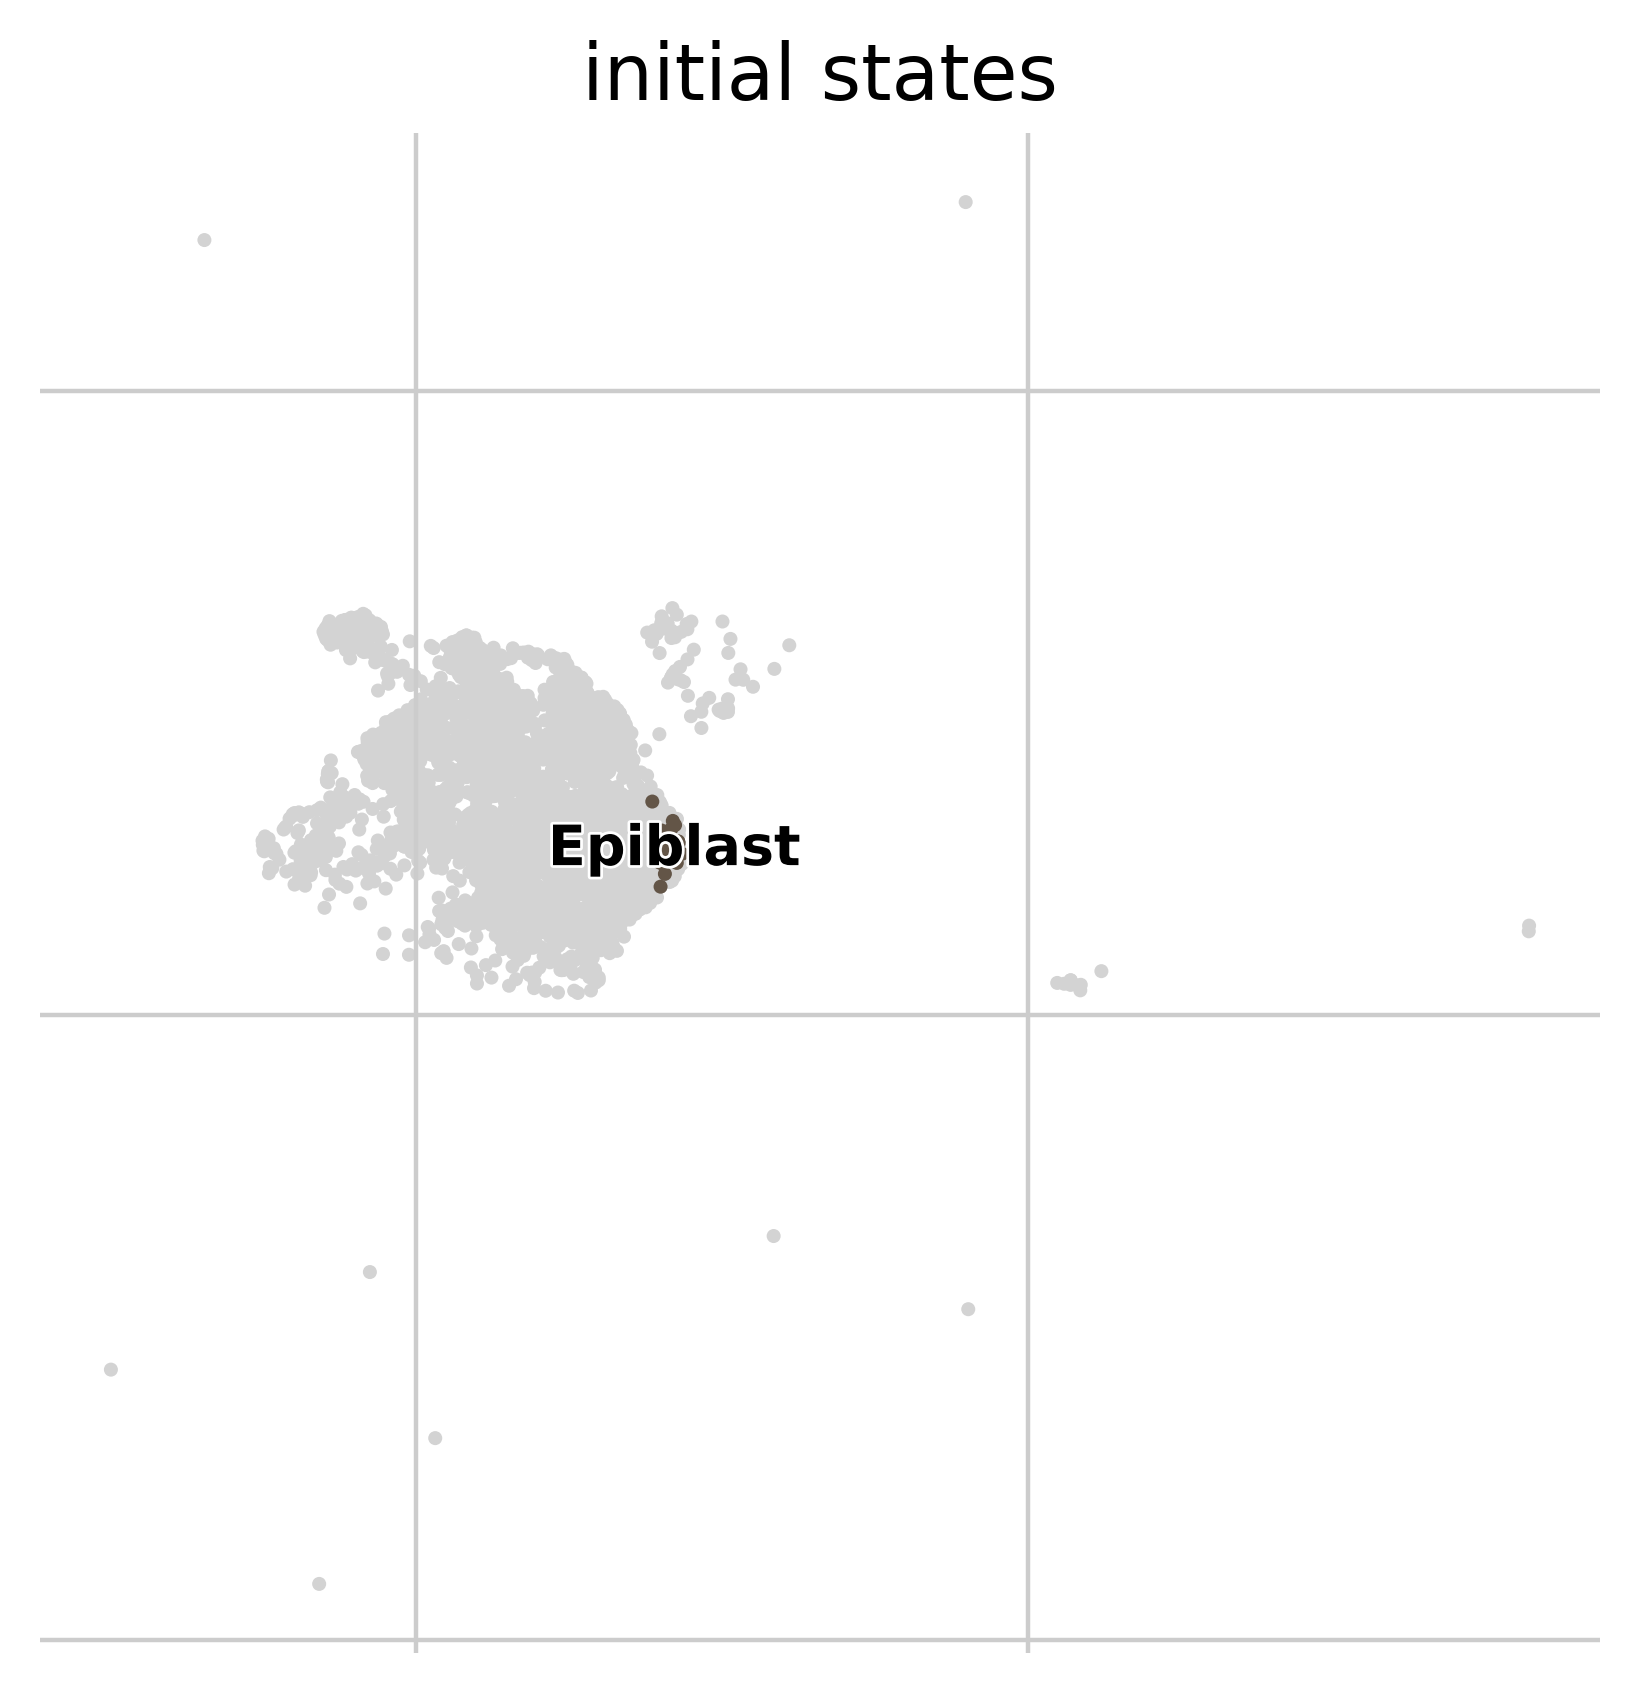

In [107]:
cr.tl.initial_states(adata, cluster_key=label)
cr.pl.initial_states(adata, discrete=True, dpi = 200, legend_fontsize = 10)

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


  0%|          | 0/1 [00:00<?, ?/s]

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


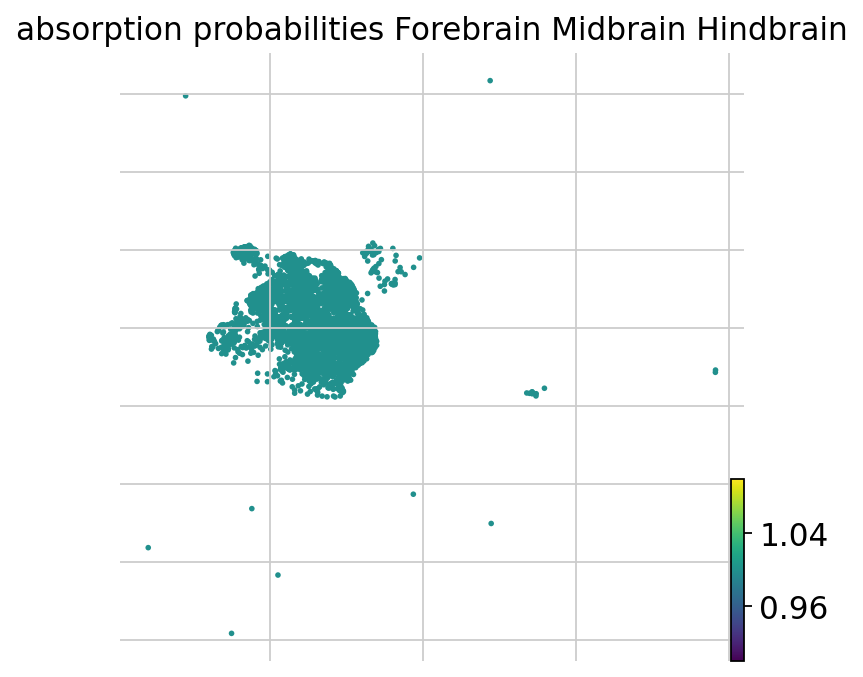

In [108]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False, )

### Use single trajectory - Spinal Cord

In [77]:
caudal = rna[rna.obs["celltype.mapped"].isin(["Spinal_cord", "Caudal_neurectoderm", "Epiblast", "Caudal_epiblast"]),] 

In [78]:
caudal.X = caudal.layers["counts"].todense()

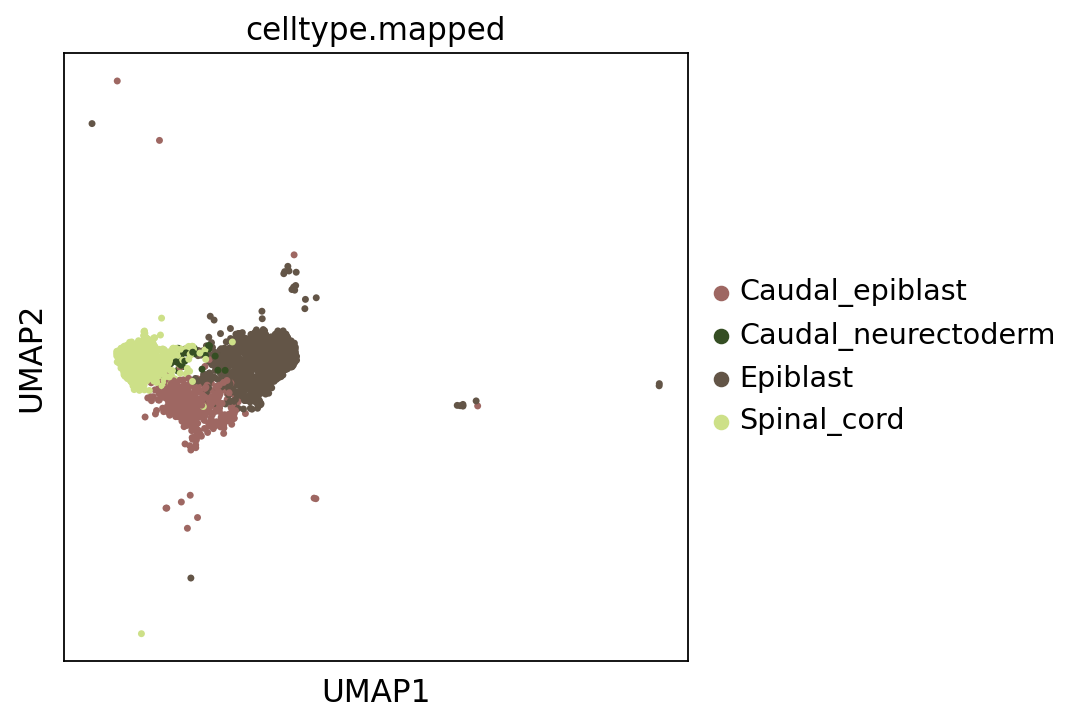

In [79]:
sc.pl.umap(rostral, color = "celltype.mapped")

In [82]:
#sc.write("/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data/UniTVelo/adata_brain_caudal_scvi.h5ad", caudal)

In [111]:
adata = sc.read_h5ad("/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data/UniTVelo/unitvelo_adata_brain_caudal_scvi.h5ad")

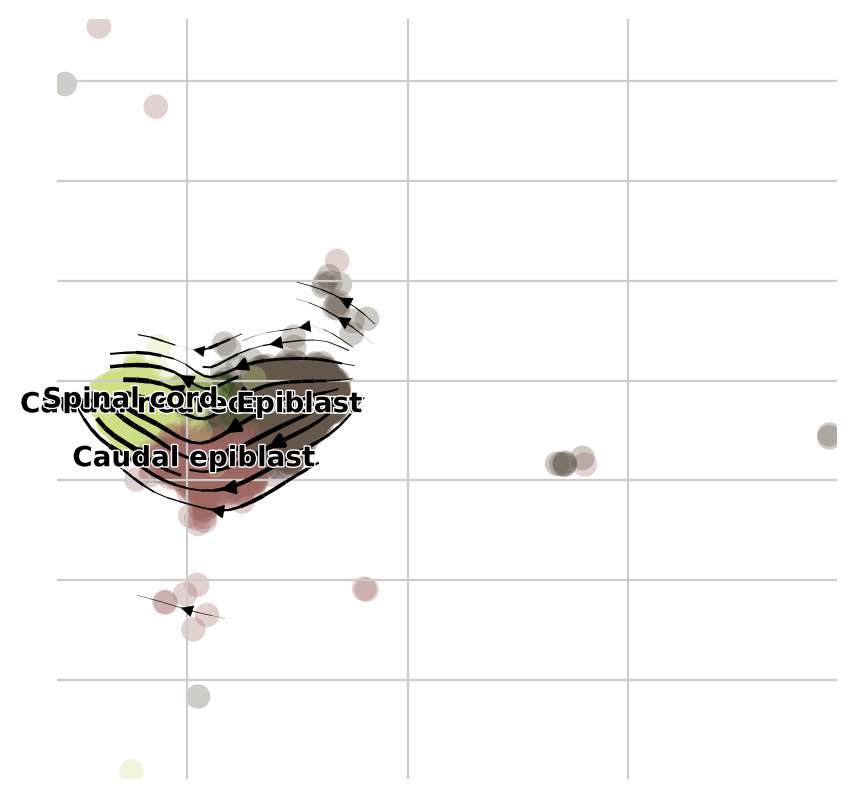

In [112]:
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='', legend_fontsize = 10)

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.
/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


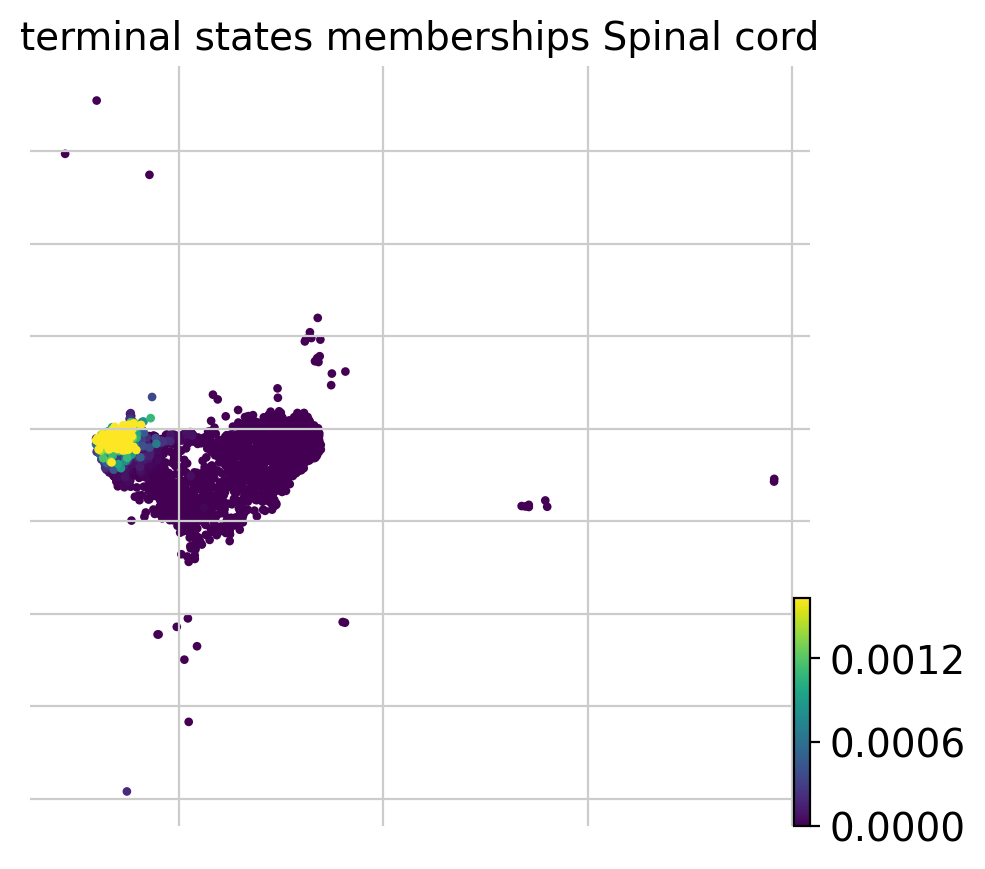

In [116]:
cr.tl.terminal_states(adata, cluster_key=label, weight_connectivities=0.2)#, n_states=4)
cr.pl.terminal_states(adata, dpi = 100, legend_fontsize = 10)

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


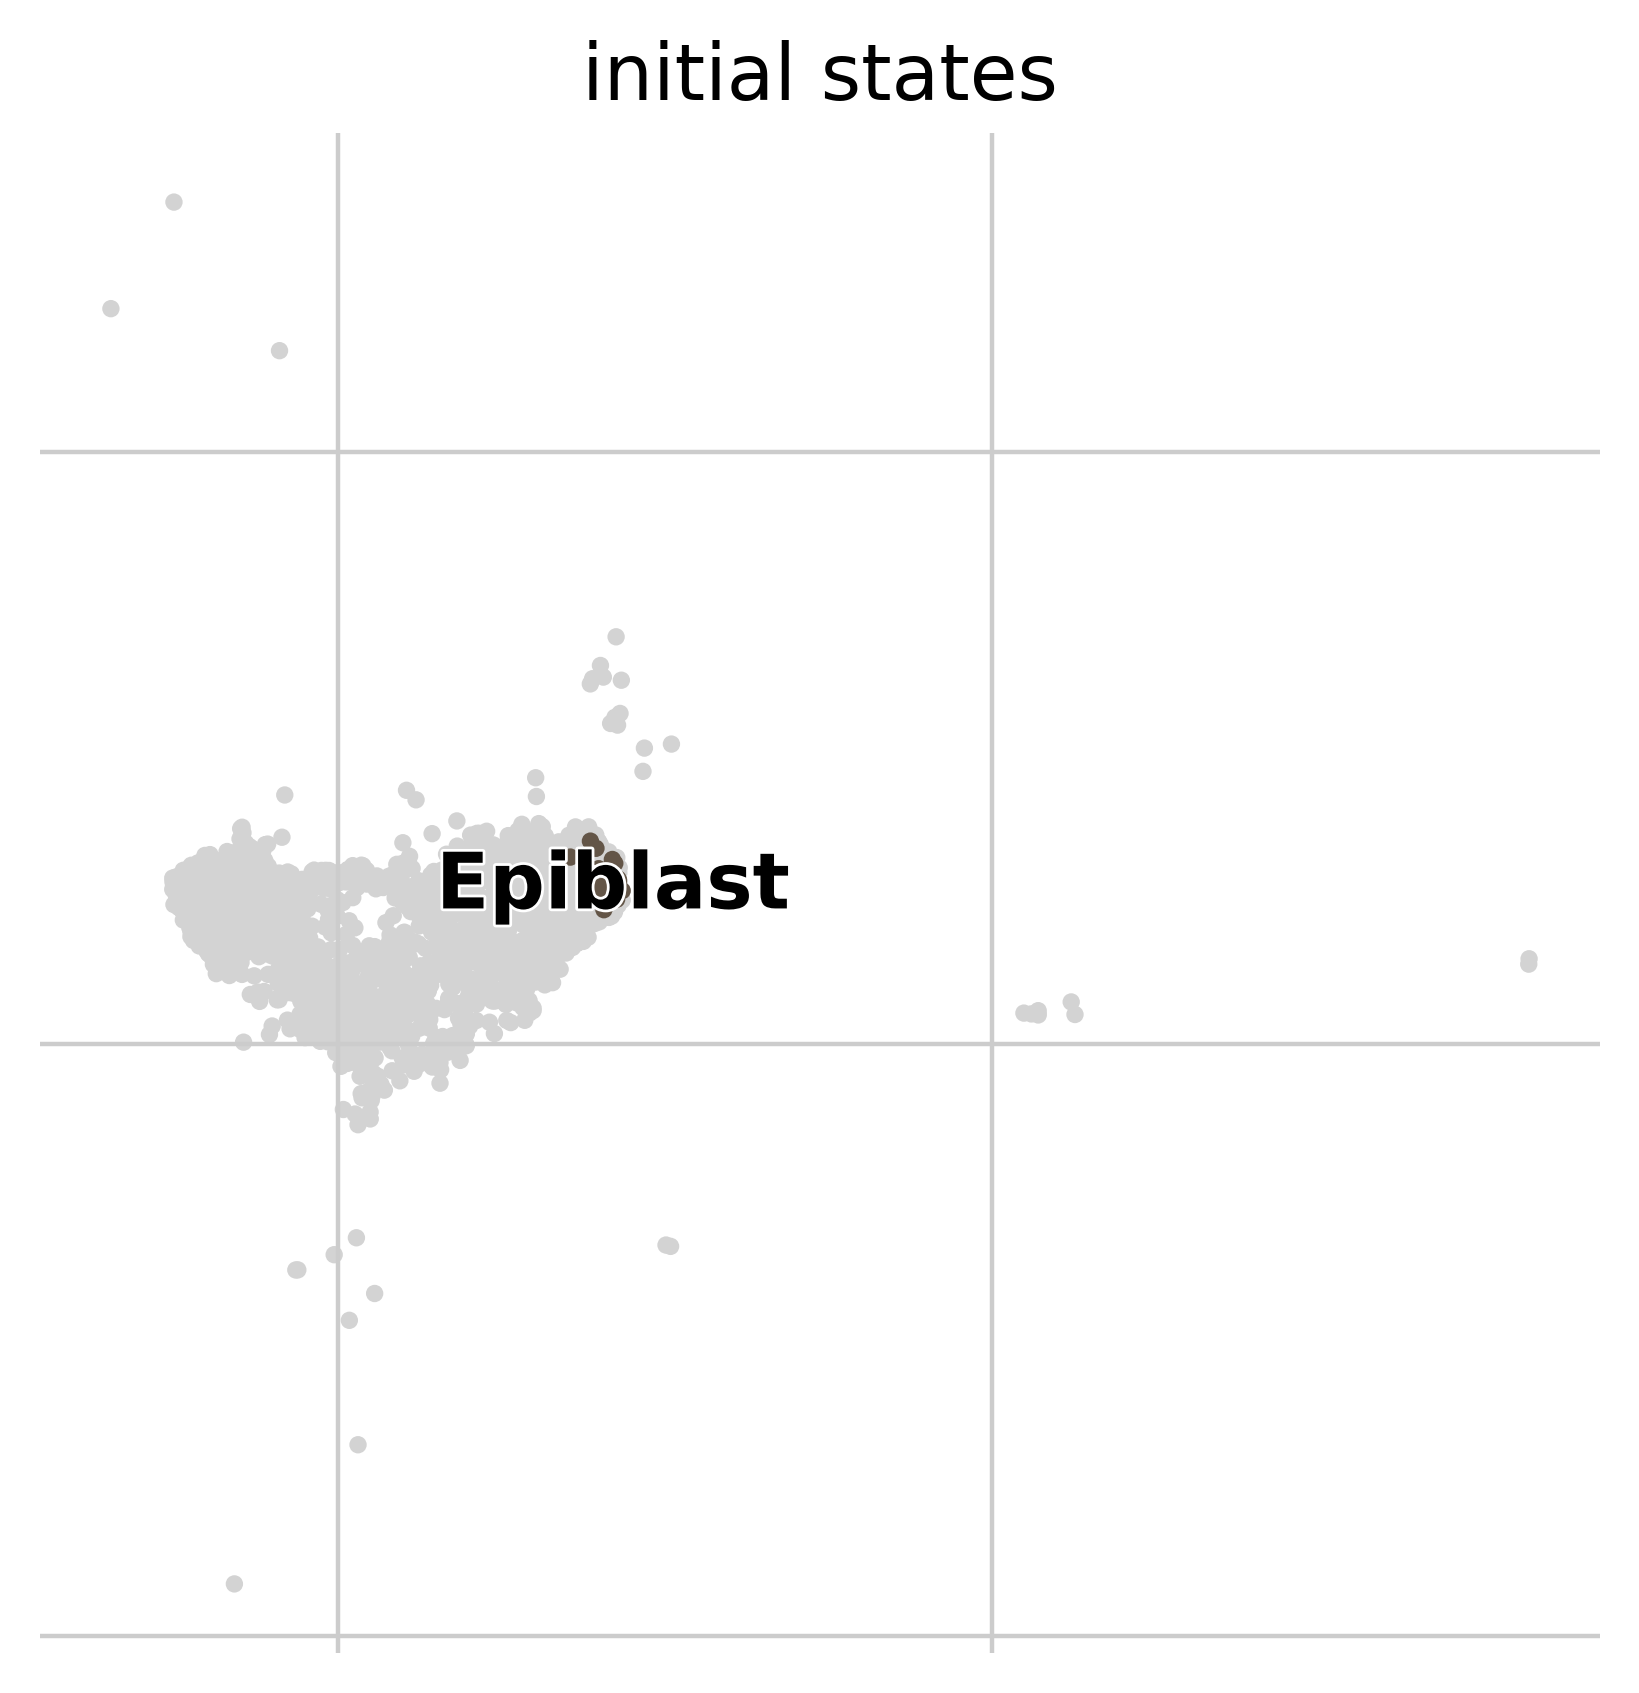

In [117]:
cr.tl.initial_states(adata, cluster_key=label)
cr.pl.initial_states(adata, discrete=True, dpi = 200)

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


  0%|          | 0/1 [00:00<?, ?/s]

[0]PETSC ERROR: [0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


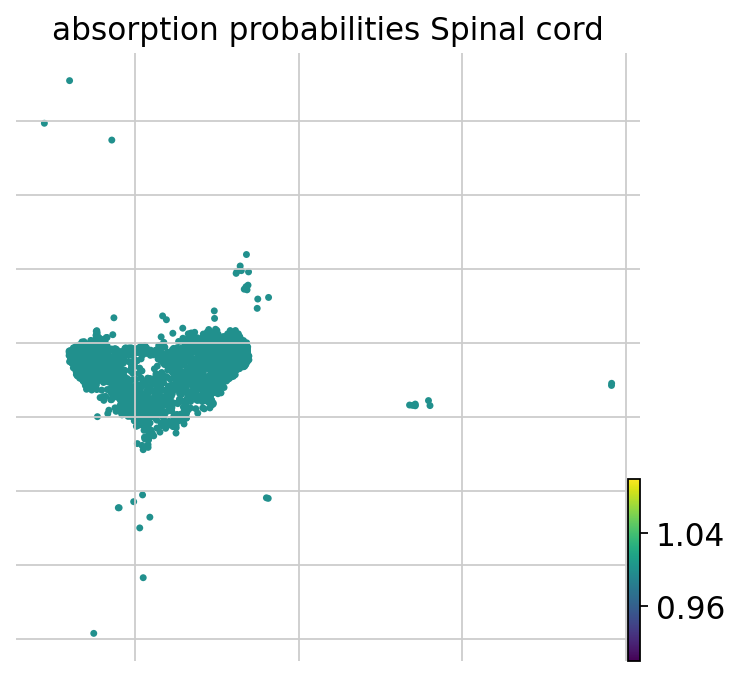

In [118]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False, )

### Brain trajectory


In [132]:
brain_sub = rna[rna.obs["celltype.mapped"].isin(["Forebrain_Midbrain_Hindbrain",  "Rostral_neurectoderm", "Spinal_cord", "Caudal_neurectoderm",  "Epiblast", "Caudal_epiblast"]),] 

In [133]:
brain_sub.X = brain_sub.layers["counts"].todense()

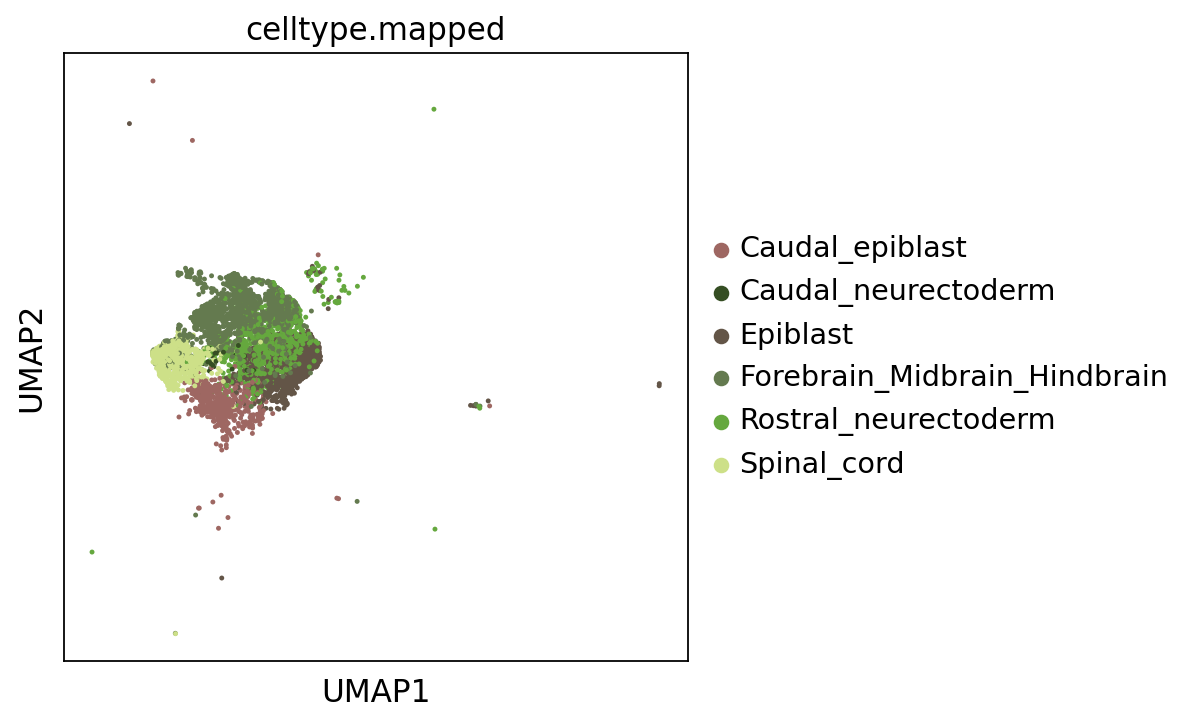

In [134]:
sc.pl.umap(brain_sub, color = "celltype.mapped")

In [136]:
#sc.write("/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data/UniTVelo/brain_sub_scvi.h5ad", brain_sub)

In [141]:
adata = sc.read_h5ad("/omics/groups/OE0533/internal/katharina/scDoRI/gastrulation_data/UniTVelo/unitvelo_brain_sub_scvi.h5ad")

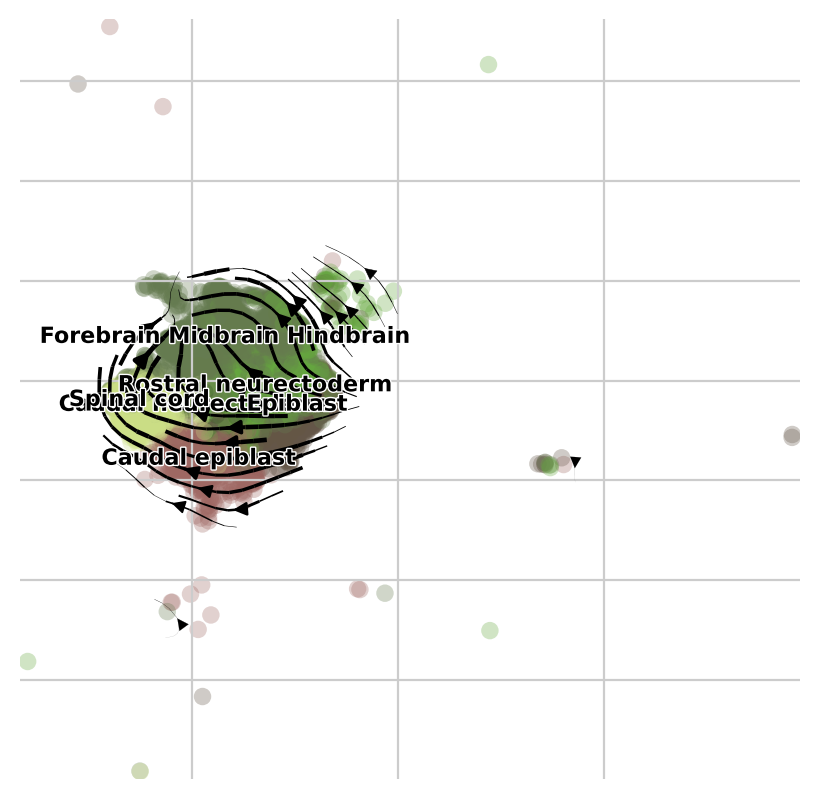

In [143]:
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='', legend_fontsize = 8)

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000082e+00 -4.7228164462971706e-02 
0.0000000000000000e+00 9.5543759866183309e-01 


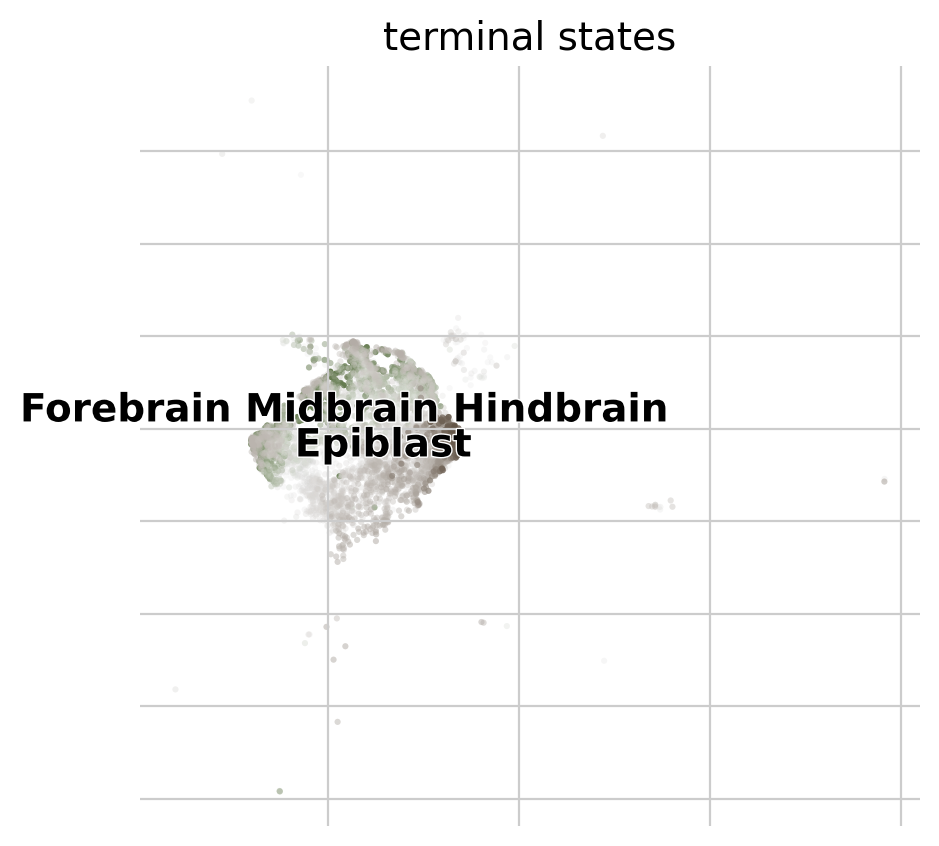

In [147]:
cr.tl.terminal_states(adata, cluster_key=label, weight_connectivities=0.2, n_states=2)
cr.pl.terminal_states(adata, dpi = 100)

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


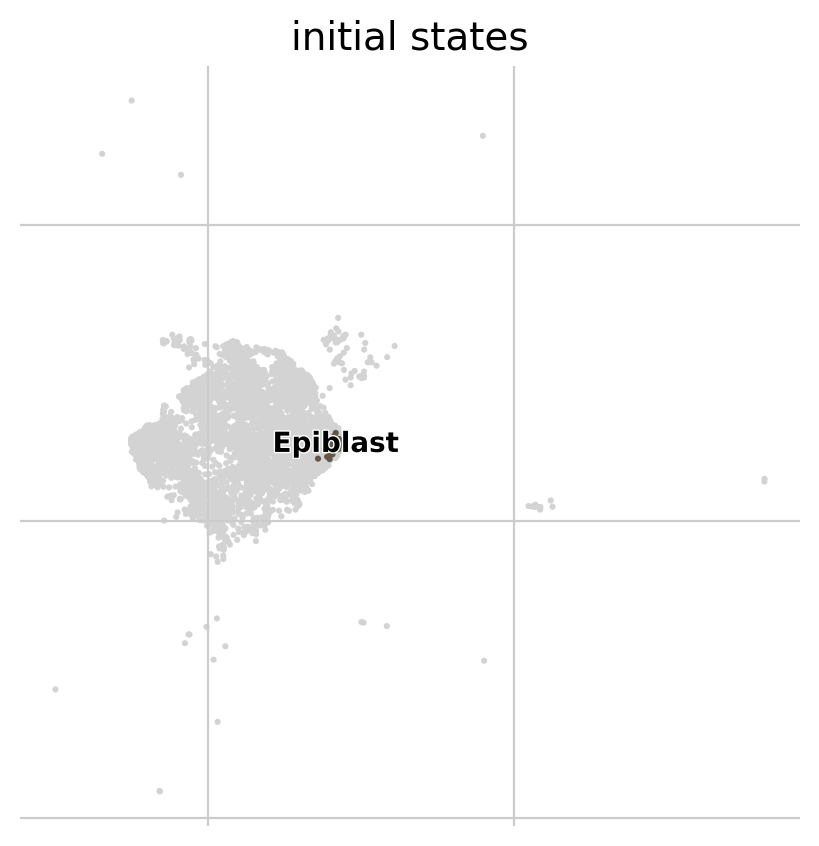

In [148]:
cr.tl.initial_states(adata, cluster_key=label)
cr.pl.initial_states(adata, discrete=True, dpi = 100, legend_fontsize = 10)

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


  0%|          | 0/2 [00:00<?, ?/s]

/omics/groups/OE0533/internal/katharina/unitvelo/lib/python3.7/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


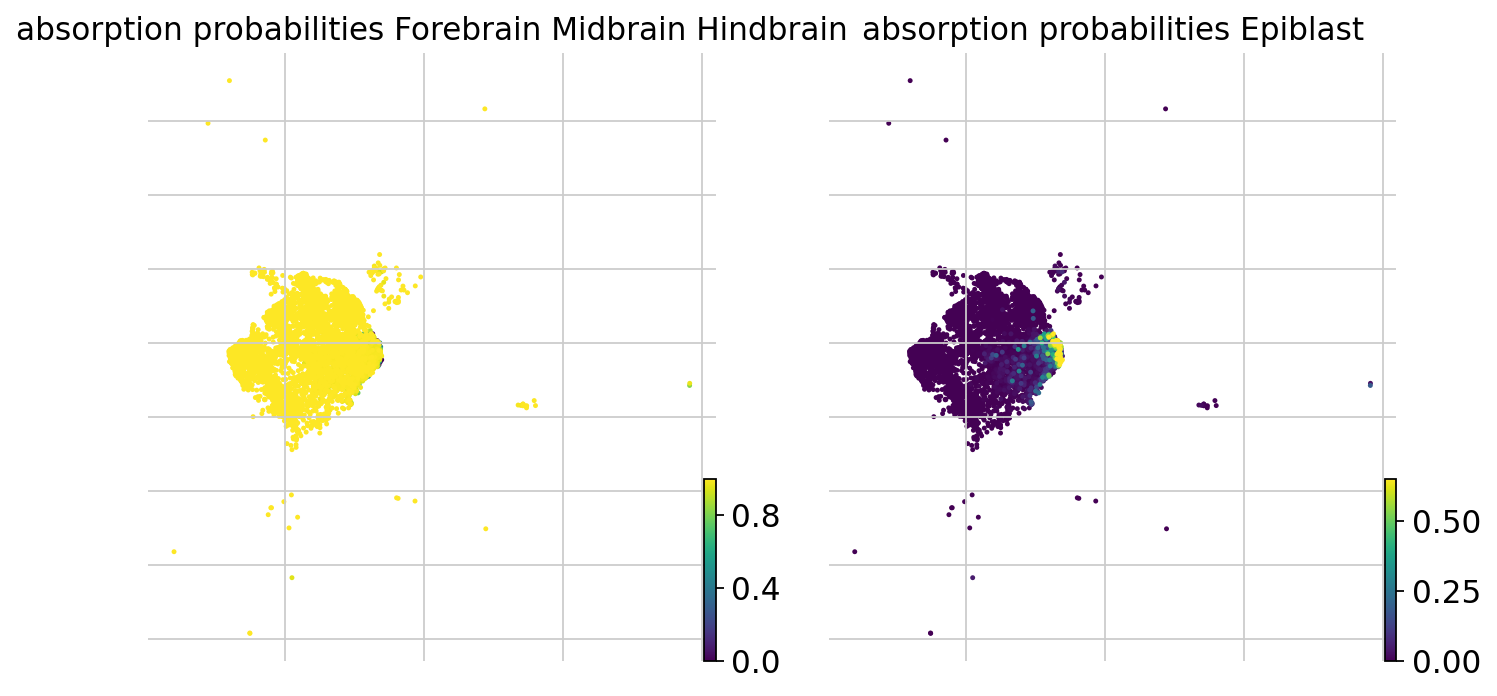

In [149]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False, )